# Variable Description Additional Information
### ID 
### First Policy 
#### Year of the customer’s first policy. 
May be considered as the first year as a customer
### Birthday 
#### Customer’s Birthday Year 
The current year of the database is
2016
### Education 
Academic Degree
### Salary 
Gross monthly salary (€)
### Area 
#### Living area 
No further information provided about the meaning of the area codes
### Children 
Binary variable (Y=1)
### CMV 
#### Customer Monetary Value
Lifetime value = (annual profit fromthe customer) X (number of yearsthat they are a customer) - (acquisition cost)
### Claims 
#### Claims Rate
Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years
### Motor 
Premiums (€) in LOB: Motor

### Household 
Premiums (€) in LOB: Household
### Health 
Premiums (€) in LOB: Health
### Life 
Premiums (€) in LOB: Life
### Work Compensation 
Premiums (€) in LOB: Work Compensations
Annual Premiums (2016)
Negative premiums may manifest
reversals occurred in the current
year, paid in previous one(s)

**Table of Contents** <br>
* [1.Import Libraries](#importlibraries)
* [2.Import Dataset](#importdataset)
* [3. Data Exploration](#initialanalysis)
    * [3.1. Checking Incoherences](#chekingincoherences)
* [4. Pre-Processing](#preprocessing)
    * [4.1. Metric and Non-Metric Features](#metricnonmetric)
    * [4.2. Missing Values](#missingvalues)
    * [4.3. Filling Missing Values](#fillmissingvalues)
    * [4.4. Creating New Variables](#newvars)
    * [4.5. Relationship of Numerical Variables](#relationbetweenvars)
* [5. Outliers](#outliers)
    * [5.1. Checking for Outliers](#chekingoutliers)
    * [5.2. Removing Outliers by Experimentation](#removingoutliers1)
    * [5.3. Removing Outliers by Variables Distribution](#removingoutliers2)
    * [5.4. Removing Outliers with IQR](#removingoutliers3)
    * [5.5. Removing Outliers with Z-Score](#removingoutliers4)
    * [5.6. Removing Outliers with DBSCAN](#removingoutliers5)
* [6. Relevancy and Redundancy](#relandredun)
    * [6.1. Relation Between Variables](#relbetvars)
    * [6.2. Correlation](#correlation)
* [7. Normalization](#normalization)
* [8. One Hot Encoding](#ohc)
* [9. PCA](#pca)
* [10. Cluestering](#clustering)
    * [10.1. Hierarchical Clustering](#hc)
    * [10.2. K-Means](#kmeans)


<hr>
<a class="anchor" id="importlibraries">
    
# 1. Import libraries
    
</a>

In [3]:
#importing the necessary libraries
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples



from itertools import product
from pandas_profiling import ProfileReport

#Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans

%matplotlib inline

%config InlineBackend.figure_format = 'retina' 

<hr>
<a class="anchor" id="importdataset">
    
# 2. Import Dataset
    
</a>

In [4]:
data = pd.read_sas('a2z_insurance.sas7bdat')

<hr>
<a class="anchor" id="initialanalysis">
    
# 3. Data Exploration
    
</a>

In [5]:
data.set_index('CustID', inplace = True)

In [6]:
data.head()
#na segunda observação o cliente é cliente à mais anos do que tem de vida

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [8]:
data.info()
# the variable children most changed to boolean type
# birthyear, custid and firstpolyear most be changed to int

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10266 non-null  float64
 1   BirthYear      10279 non-null  float64
 2   EducDeg        10279 non-null  object 
 3   MonthSal       10260 non-null  float64
 4   GeoLivArea     10295 non-null  float64
 5   Children       10275 non-null  float64
 6   CustMonVal     10296 non-null  float64
 7   ClaimsRate     10296 non-null  float64
 8   PremMotor      10262 non-null  float64
 9   PremHousehold  10296 non-null  float64
 10  PremHealth     10253 non-null  float64
 11  PremLife       10192 non-null  float64
 12  PremWork       10210 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


<hr>
<a class="anchor" id="chekingincoherences">
    
# 3.1. Cheking Incoherences
    
</a>

In [45]:
# checking for incoherences
min_age = min(data.BirthYear)
max_age = max(data.BirthYear)
print(min_age)
print(max_age)

1028.0
2001.0


In [46]:
# checking for people with over 100 years
data[data.BirthYear < 1916]
# remove this observation

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
7196.0,1993.0,1028.0,b'3 - BSc/MSc',2830.0,4.0,0.0,146.02,0.77,428.97,192.8,108.91,1.89,23.67


In [47]:
# # dropping the observation
# data.drop(index = 7196, inplace = True)
# # confirmation
# data[data.BirthYear < 1916]

In [48]:
# percentage of the data where age is smaller than number of years as a customer
(sum(data.BirthYear > data.FirstPolYear) / data.shape[0]) * 100
# the percentage is to high for the removal of the data

19.395881895881896

In [49]:
# checking the youngest people
data[data.BirthYear == 2001]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
660.0,1991.0,2001.0,b'1 - Basic',1284.0,4.0,1.0,243.50,0.81,46.23,1079.65,72.68,252.27,-10.00
690.0,1997.0,2001.0,b'1 - Basic',1180.0,3.0,1.0,436.10,0.48,54.90,406.20,65.79,112.02,256.05
866.0,1979.0,2001.0,b'1 - Basic',562.0,1.0,1.0,1113.78,0.11,40.34,847.95,94.24,178.70,112.13
1437.0,1989.0,2001.0,b'1 - Basic',823.0,4.0,0.0,281.28,0.60,129.58,177.80,58.01,176.70,218.15
2580.0,1986.0,2001.0,b'1 - Basic',1006.0,4.0,0.0,267.95,0.67,48.23,396.75,291.50,127.58,24.45
3147.0,1994.0,2001.0,b'1 - Basic',372.0,4.0,1.0,488.76,0.36,60.68,270.60,177.59,182.48,107.13
4466.0,1978.0,2001.0,b'1 - Basic',958.0,4.0,0.0,-204.59,1.11,28.56,1359.15,68.79,38.23,179.59
4484.0,1983.0,2001.0,b'1 - Basic',1241.0,3.0,1.0,909.17,0.13,43.34,589.55,142.47,121.80,179.48
5348.0,1980.0,2001.0,b'1 - Basic',1119.0,3.0,1.0,796.71,0.23,148.14,628.45,221.82,45.12,30.23


In [50]:
# checking the caracheteristics of the people in the incoherence 
data[data.BirthYear > data.FirstPolYear].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FirstPolYear,1997.0,NaN,NaN,NaN,1982.228843,5.531945,1974.0,1978.0,1981.0,1986.0,1998.0
BirthYear,1997.0,NaN,NaN,NaN,1990.629444,5.747256,1975.0,1986.0,1991.0,1995.0,2001.0
EducDeg,1996,4,b'2 - High School',685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,1985.0,NaN,NaN,NaN,1332.64131,875.566802,333.0,985.0,1290.0,1640.0,34490.0
GeoLivArea,1997.0,NaN,NaN,NaN,2.69354,1.274155,1.0,1.0,3.0,4.0,4.0
Children,1994.0,NaN,NaN,NaN,0.830993,0.374852,0.0,1.0,1.0,1.0,1.0
CustMonVal,1997.0,NaN,NaN,NaN,246.387336,445.110036,-10107.37,-1.33,187.25,436.1,2054.07
ClaimsRate,1997.0,NaN,NaN,NaN,0.711427,0.512061,0.0,0.42,0.73,0.97,13.9
PremMotor,1989.0,NaN,NaN,NaN,177.667783,122.510217,-4.11,71.57,149.36,264.16,542.99
PremHousehold,1997.0,NaN,NaN,NaN,375.757762,327.50224,-75.0,122.25,285.6,564.55,2223.75


In [51]:
#proposal
# they are customers as many years as they are alive ????
# removing doesn't seem to be a option
# see the age and assume the number of years they can be a customer??
# using Customer Monetary Value ??? but what is aquisition cost?? profit total of premiuns - amount paid from Claims Rate???
# if i assume that the other observations are correct may I retrieve the aquisition cost

In [52]:
# best option
# removing the variables
data.drop(columns = ['FirstPolYear', 'BirthYear'], inplace = True )

<hr>
<a class="anchor" id="preprocessing">
    
# 4. Pre-processing
    
</a>

<hr>
<a class="anchor" id="metricnonmetric">
    
# 4.1. Metric and Non-Metric Features
    
</a>

In [53]:
non_metric_features = ["EducDeg", "Children", "GeoLivArea"]
metric_features = data.columns.drop(non_metric_features).to_list()

<hr>
<a class="anchor" id="missingvalues">
    
# 4.2. Missing Values
    
</a>

In [56]:
#cheking for missing values
data.isna().sum()
#multiple variables with missing values

EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

<hr>
<a class="anchor" id="fillmissingvalues">
    
# 4.3. Filling Missing Values
    
</a>

In [57]:
#filling metric features with the median
data.fillna(data.median(), inplace=True)
#filling non-metric features with the mode
data.fillna(data[non_metric_features].mode().loc[0], inplace=True)

data.isna().sum()  # checking how many NaNs we still have

EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

In [60]:
# checking the distribution of the variables
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EducDeg,10296,4,b'3 - BSc/MSc',4816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10296.0,NaN,NaN,NaN,2506.64899,1155.424192,333.0,1708.5,2501.5,3289.0,55215.0
GeoLivArea,10296.0,NaN,NaN,NaN,2.709887,1.266232,1.0,1.0,3.0,4.0,4.0
Children,10296.0,NaN,NaN,NaN,0.707362,0.454996,0.0,0.0,1.0,1.0,1.0
CustMonVal,10296.0,NaN,NaN,NaN,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,NaN,NaN,NaN,0.742772,2.916964,0.0,0.39,0.72,0.98,256.2
PremMotor,10296.0,NaN,NaN,NaN,300.464109,211.564802,-4.11,191.3425,298.61,407.52,11604.42
PremHousehold,10296.0,NaN,NaN,NaN,210.431192,352.595984,-75.0,49.45,132.8,290.05,25048.8
PremHealth,10296.0,NaN,NaN,NaN,171.544203,295.786857,-2.11,111.91,162.81,218.9575,28272.0
PremLife,10296.0,NaN,NaN,NaN,41.691178,47.268297,-7.0,9.89,25.56,57.01,398.3


In [61]:
# #correcting the variables types
# data.Children = data.Children.astype("boolean")  

In [62]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EducDeg,10296,4,b'3 - BSc/MSc',4816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10296.0,NaN,NaN,NaN,2506.64899,1155.424192,333.0,1708.5,2501.5,3289.0,55215.0
GeoLivArea,10296.0,NaN,NaN,NaN,2.709887,1.266232,1.0,1.0,3.0,4.0,4.0
Children,10296.0,NaN,NaN,NaN,0.707362,0.454996,0.0,0.0,1.0,1.0,1.0
CustMonVal,10296.0,NaN,NaN,NaN,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,NaN,NaN,NaN,0.742772,2.916964,0.0,0.39,0.72,0.98,256.2
PremMotor,10296.0,NaN,NaN,NaN,300.464109,211.564802,-4.11,191.3425,298.61,407.52,11604.42
PremHousehold,10296.0,NaN,NaN,NaN,210.431192,352.595984,-75.0,49.45,132.8,290.05,25048.8
PremHealth,10296.0,NaN,NaN,NaN,171.544203,295.786857,-2.11,111.91,162.81,218.9575,28272.0
PremLife,10296.0,NaN,NaN,NaN,41.691178,47.268297,-7.0,9.89,25.56,57.01,398.3


<hr>
<a class="anchor" id="newvars">
    
# 4.4. Creating New Variables
    
</a>

In [63]:
# It is created a new dataframe so that any change does not affect the original data
df = data.copy()

In [65]:
#Feature Engeneering
# avg_spend_premiuns - average spend on premiuns by number od years as customer
df['Avg_Premiuns'] = (df['PremHousehold']+df['PremHealth']+df['PremLife']+df['PremWork'] + df['PremMotor']) / 5


In [66]:
# checking if everything is correct
df.head()

,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns
CustID,,,,,,,,,,,,
1.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,133.112
2.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,182.192
3.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,148.120
4.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,120.136
5.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,125.848


In [67]:
#adding the new variable to the metric features
metric_features.append('Avg_Premiuns')
metric_features

['MonthSal',
 'CustMonVal',
 'ClaimsRate',
 'PremMotor',
 'PremHousehold',
 'PremHealth',
 'PremLife',
 'PremWork',
 'Avg_Premiuns']

In [68]:
# confirmation that everything is correct with the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EducDeg        10296 non-null  object 
 1   MonthSal       10296 non-null  float64
 2   GeoLivArea     10296 non-null  float64
 3   Children       10296 non-null  float64
 4   CustMonVal     10296 non-null  float64
 5   ClaimsRate     10296 non-null  float64
 6   PremMotor      10296 non-null  float64
 7   PremHousehold  10296 non-null  float64
 8   PremHealth     10296 non-null  float64
 9   PremLife       10296 non-null  float64
 10  PremWork       10296 non-null  float64
 11  Avg_Premiuns   10296 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.0+ MB


In [11]:
# distribution of the variables after the filling of missing values and creation of new variables
df.describe(include = 'all').T

NameError: name 'df' is not defined

<hr>
<a class="anchor" id="relationbetweenvars">
    
# 4.5. Relationship of Numerical Variables
    
</a>

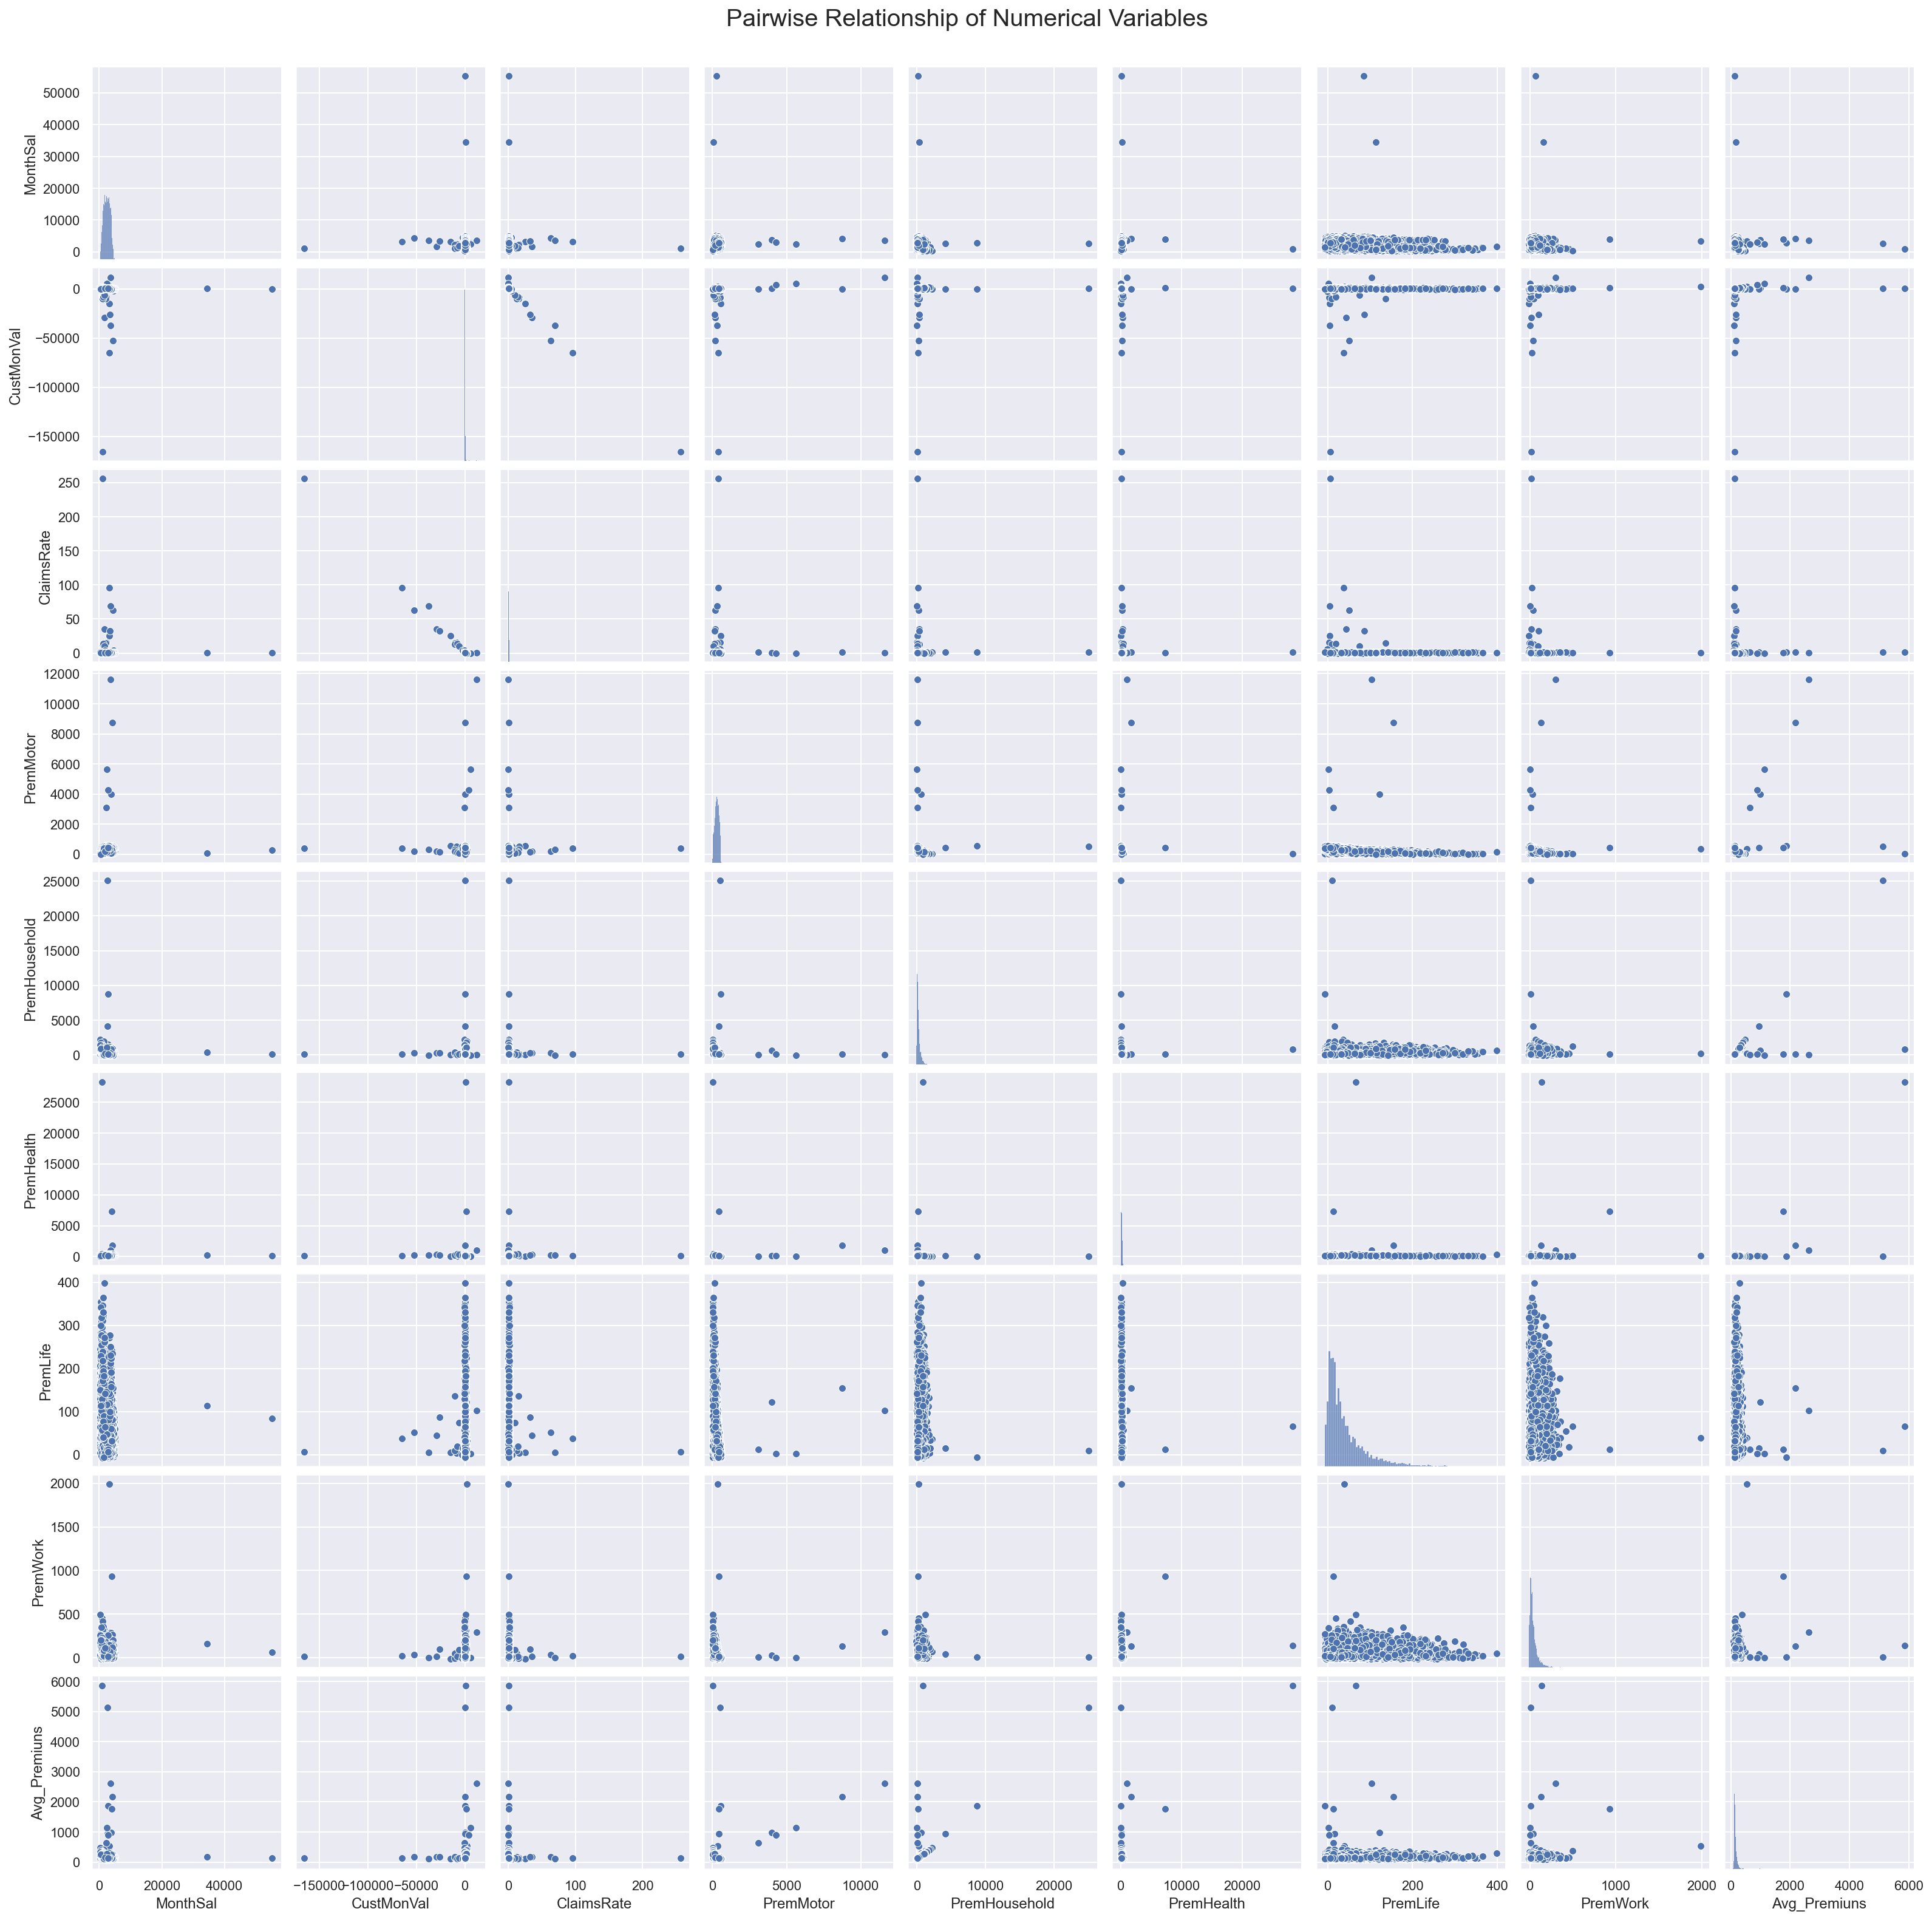

In [71]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

In [ ]:
# Pairwise Relationship of Numerical Variables considering if they have children or not
sns.set()

# Setting pairplot
sns.pairplot(df_filter1[metric_features + ['Children']], diag_kind="hist", hue='Children')

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

<hr>
<a class="anchor" id="outliers">
    
# 5. Outliers
    
</a>

<hr>
<a class="anchor" id="chekingoutliers">
    
# 5.1. Checking for Outliers
    
</a>

In [72]:
# checking the values of the variables
# some of this thresholds are can be disputed because of the type of variables
#salary
df[df.MonthSal > 5500] # 5500 parece-me ser um bom threshold
# Customer Value
df[df.CustMonVal > 2100] # 2100 parece-me ser um bom threshold, mas serão verdadeiros outliers
df[df.CustMonVal < -10500] # 2100 parece-me ser um bom threshold, mas serão verdadeiros outliers
#Claims Rate
df[df.ClaimsRate > 50] # 50 parece-me ser um bom threshold
#PremMotor
df[df.PremMotor > 700] # 700 parece-me ser um bom threshold
# PremHouseHold
df[df.PremHousehold > 2500] # 2500 parece-me ser um bom threshold
#PremLife
df[df.PremLife > 370] # 370 parece-me ser um bom threshold
# PremWork
df[df.PremWork > 500] # 500 parece-me ser um bom threshold
# PremHealth
df[df.PremHealth > 460] # 460  parece-me ser um bom threshold





,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns
CustID,,,,,,,,,,,,
5212.0,b'2 - High School',4135.0,3.0,0.0,130.14,0.99,8744.61,101.70,1767.00,155.14,130.58,2179.806
5294.0,b'3 - BSc/MSc',3564.0,3.0,1.0,11875.89,0.09,11604.42,48.90,1045.52,103.13,296.47,2619.688
7962.0,b'3 - BSc/MSc',4002.0,3.0,0.0,1457.99,0.83,431.86,107.80,7322.48,12.89,930.44,1761.094
9150.0,b'2 - High School',987.0,3.0,1.0,804.05,0.97,26.34,829.05,28272.00,65.68,138.25,5866.264


<hr>
<a class="anchor" id="removingoutliers1">
    
# 5.2. Removing Outliers by Experimentation
    
</a>

In [73]:
# this first filtering is done by experimentation of the values of the variables
df_filter1 = df.loc[
    (df.MonthSal <= 5500)
    &
    (df.CustMonVal <= 2100)
    &
    (df.CustMonVal >= -5000)
    &
    (df.ClaimsRate <= 50)
    &
    (df.PremMotor <= 700)
    &
    (df.PremHousehold <= 2500)
    &
    (df.PremLife <= 370)
    &
    (df.PremWork <= 500)
    &
    (df.PremHealth <= 460)
]

<hr>
<a class="anchor" id="removingoutliers2">
    
# 5.3. Removing Outliers by Variables Distribution
    
</a>

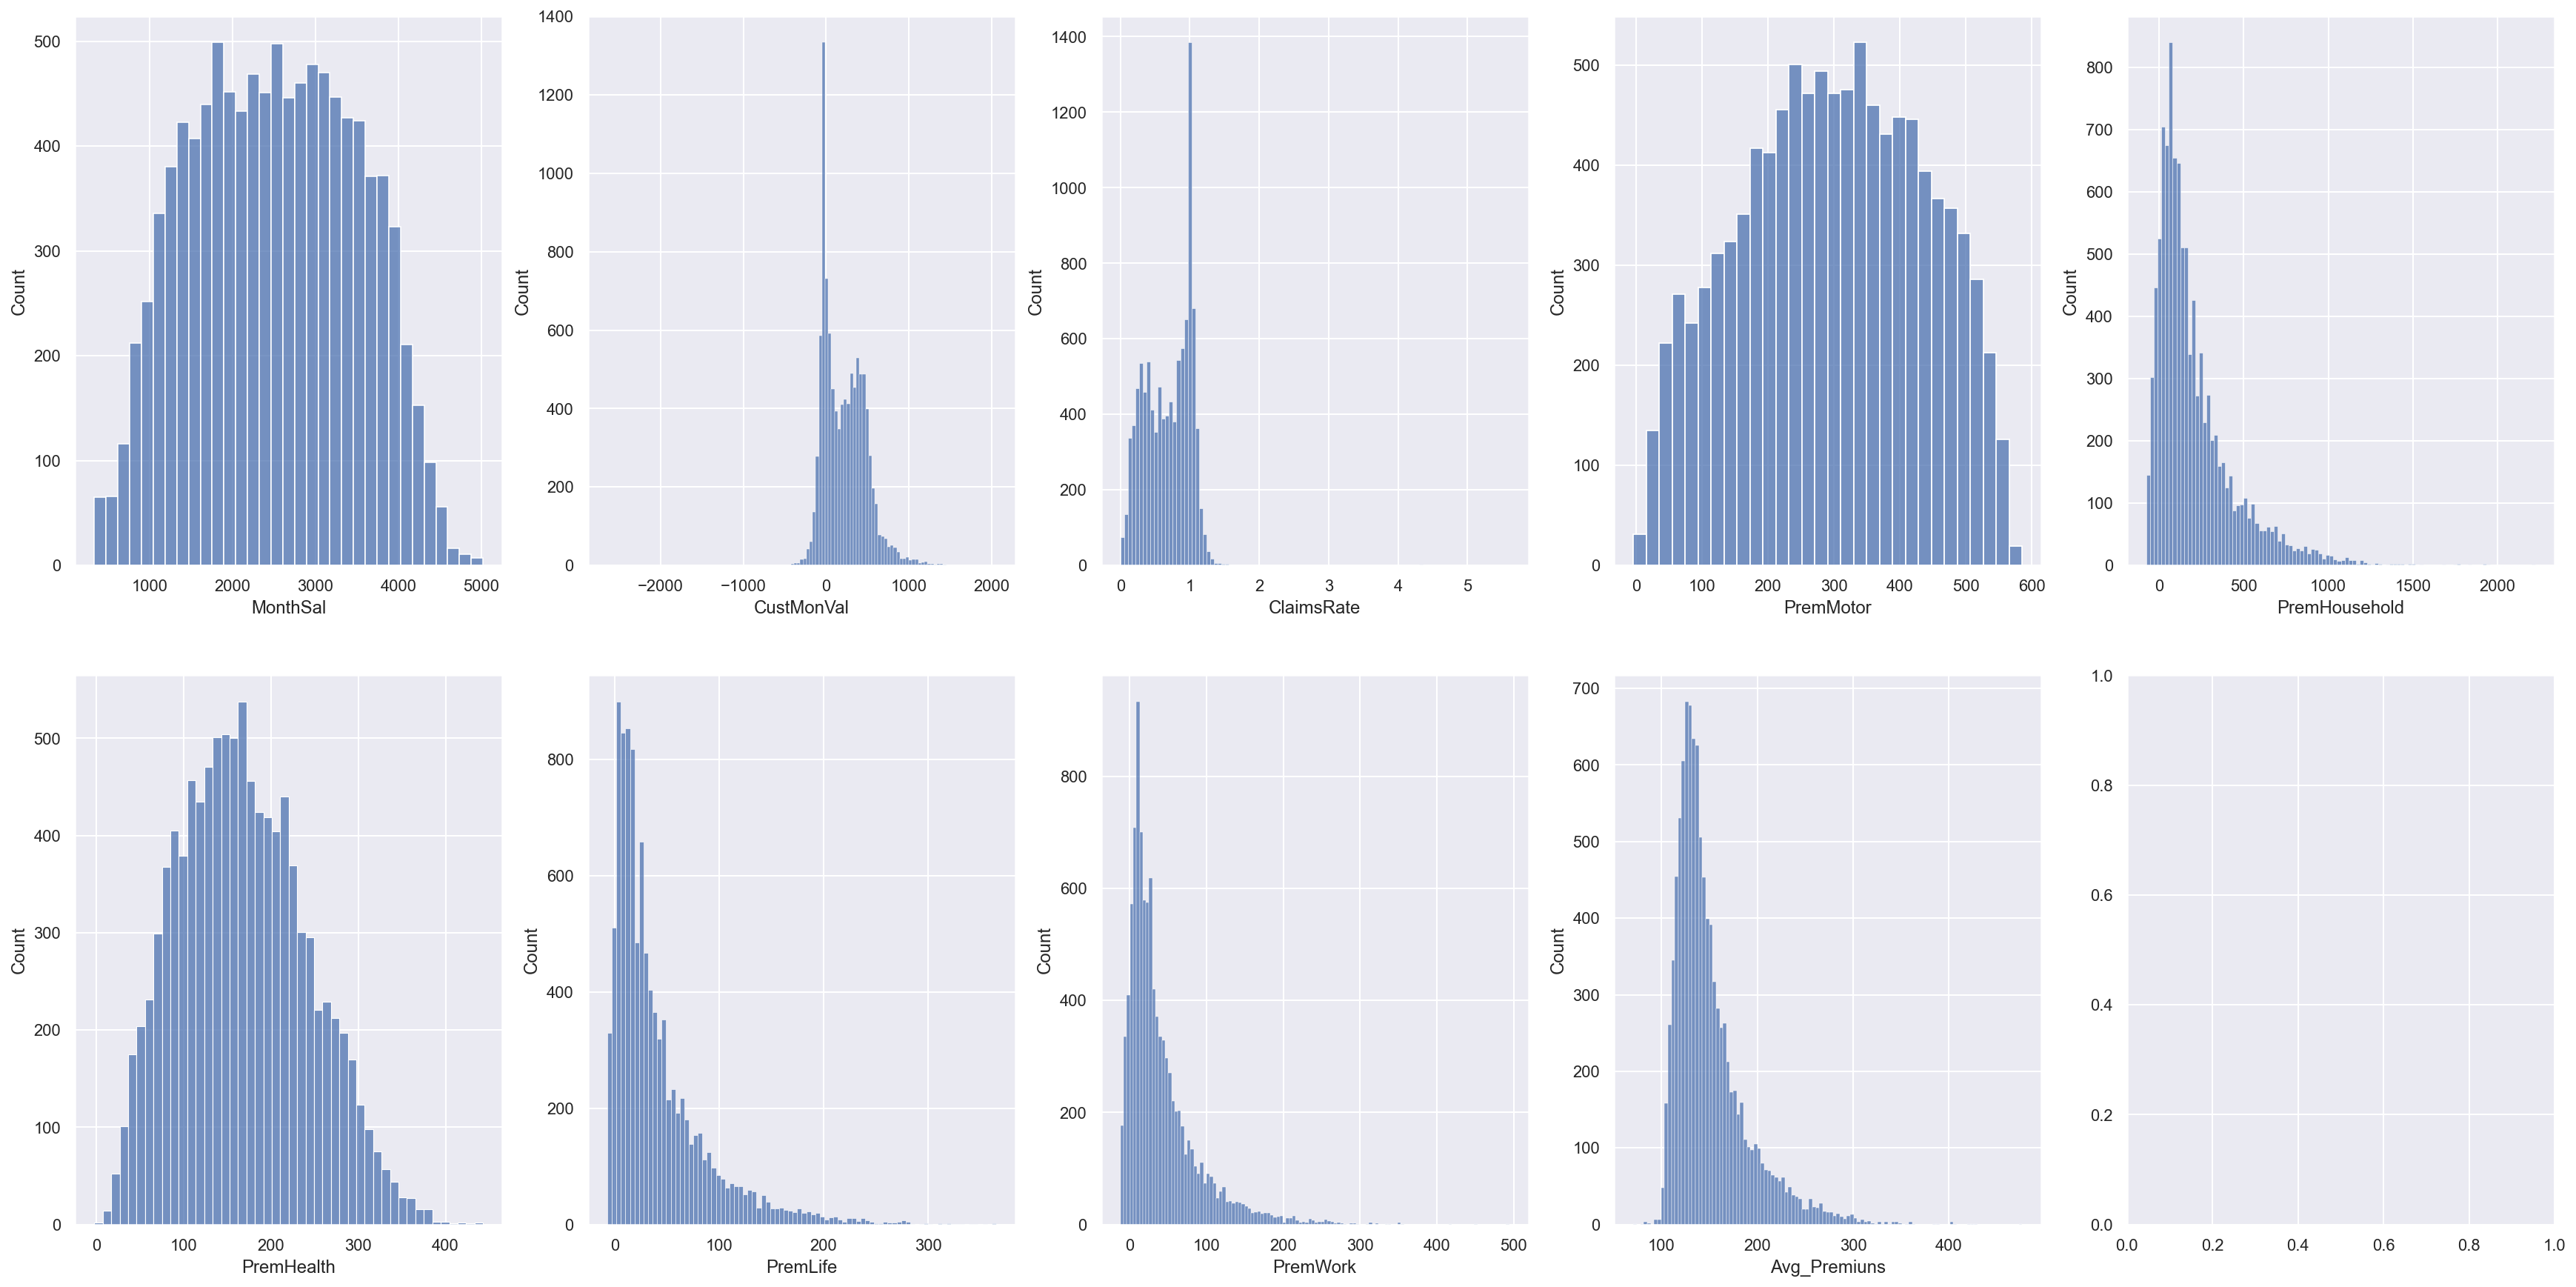

In [75]:
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(30, 15))
# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(df_filter1[feat], ax=ax)
    #ax.set_title(feat, y=-0.15)
plt.show()

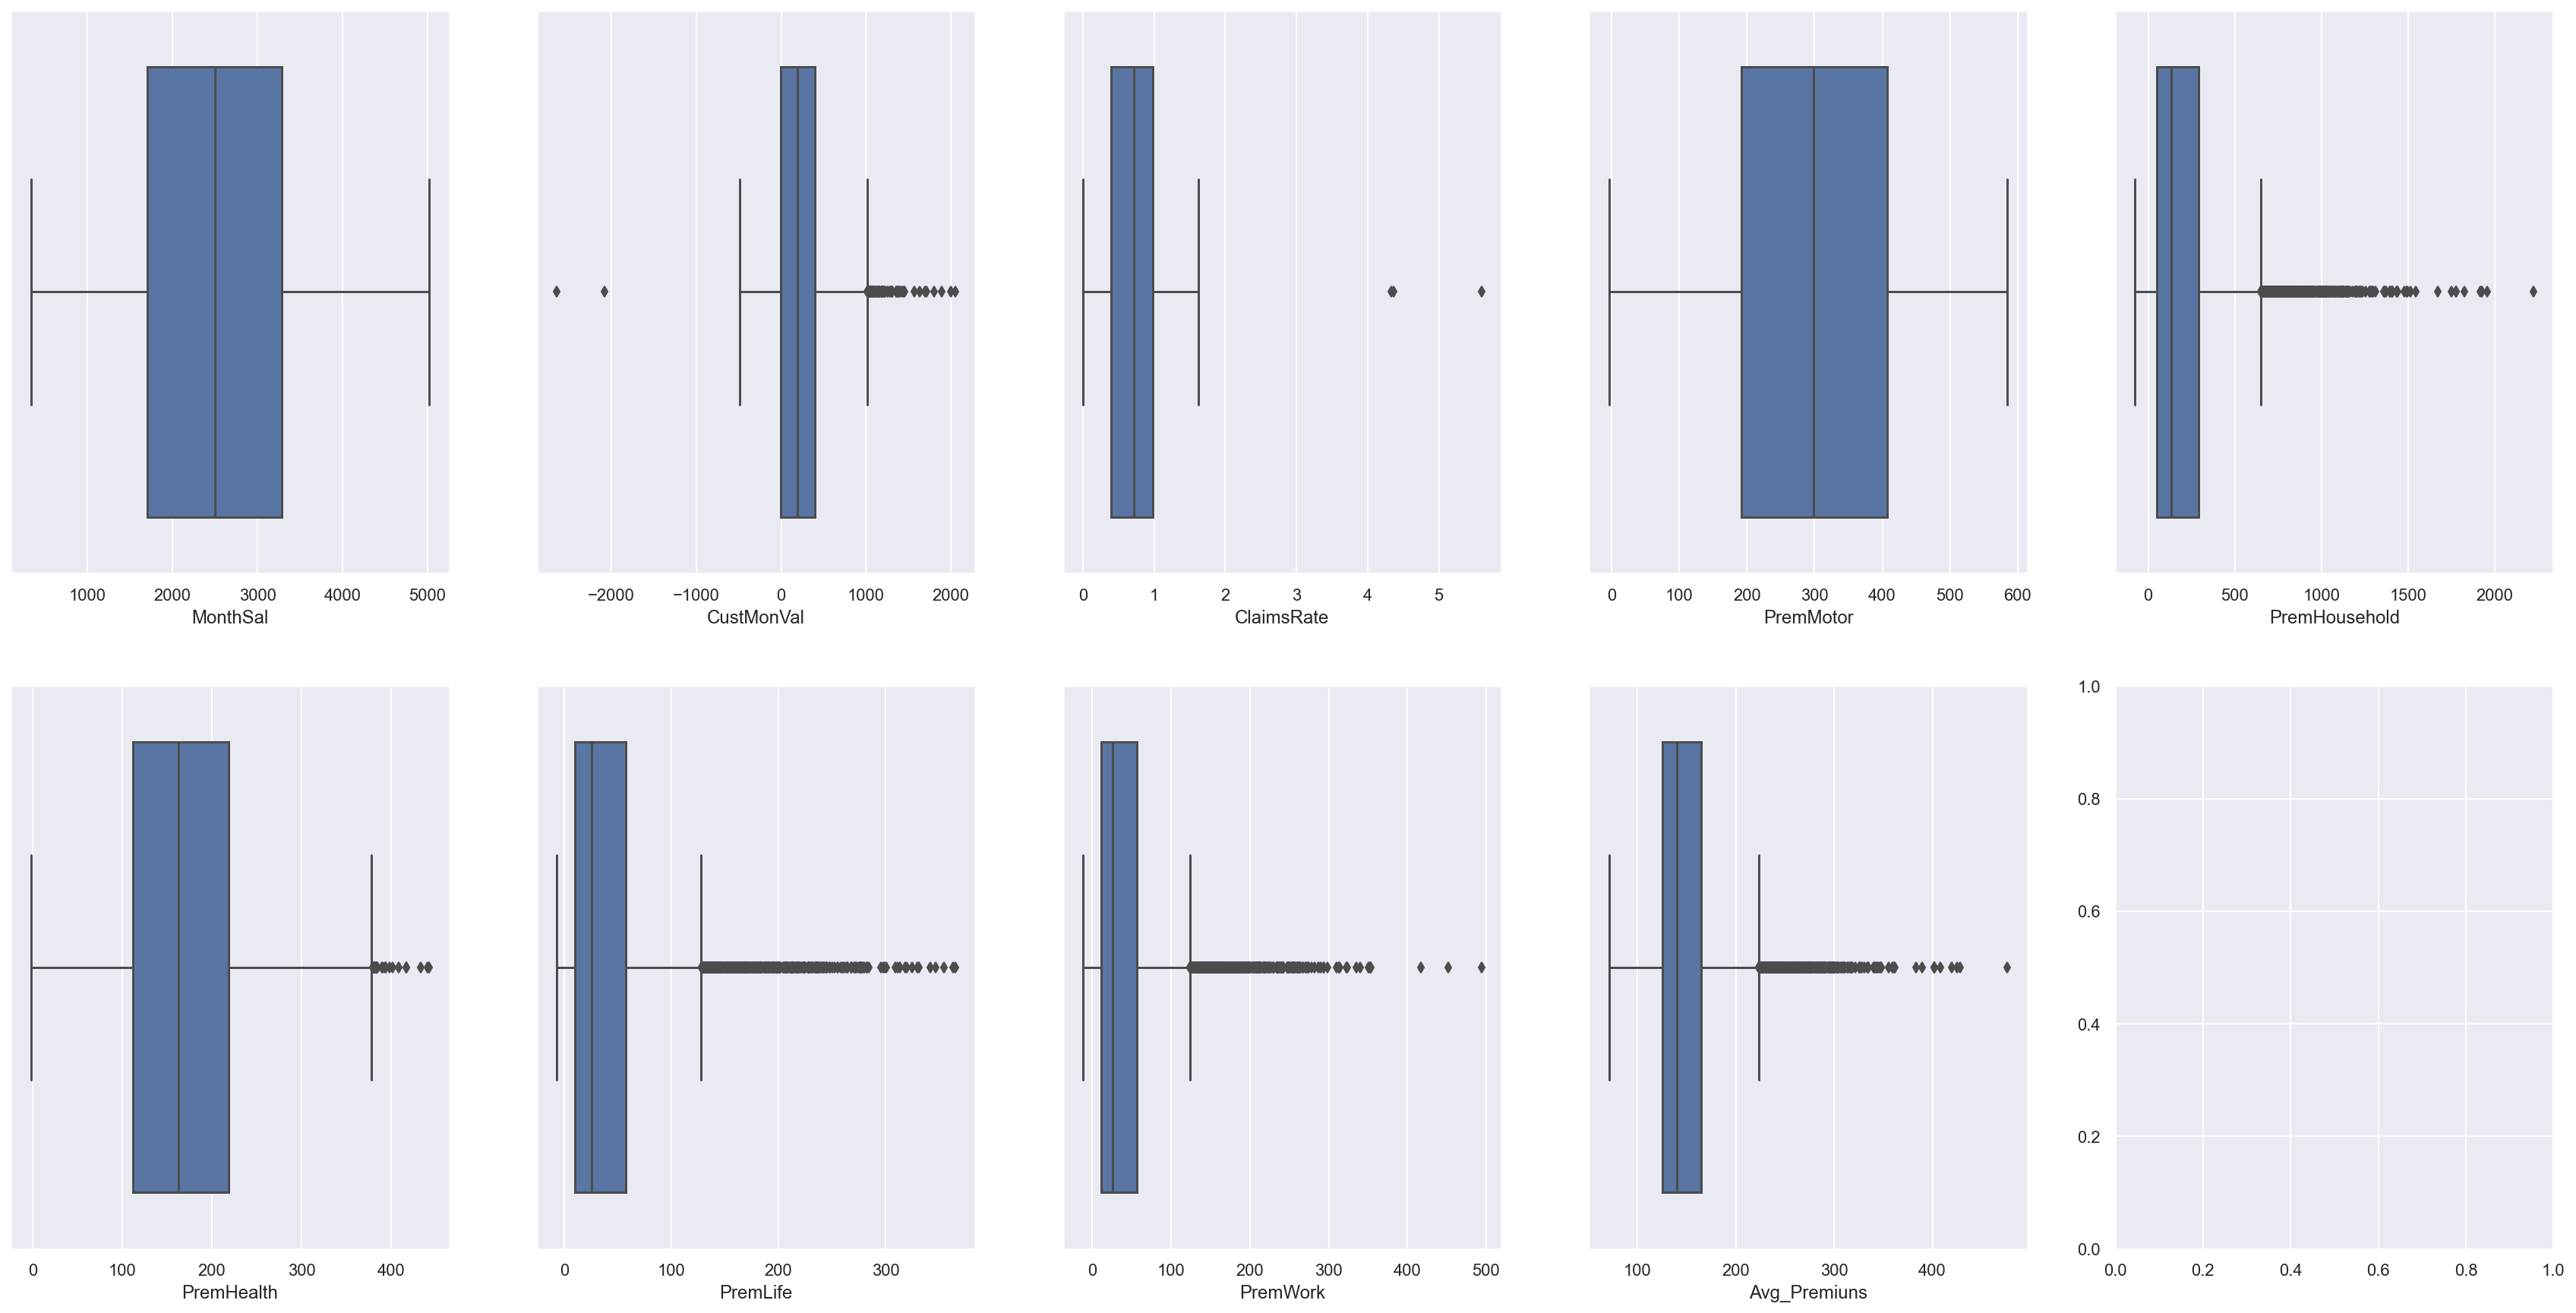

In [77]:
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(30, 15))
# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(data=df_filter1, x=feat, ax=ax)
    #ax.set_title(feat, y=-0.15)
plt.show()

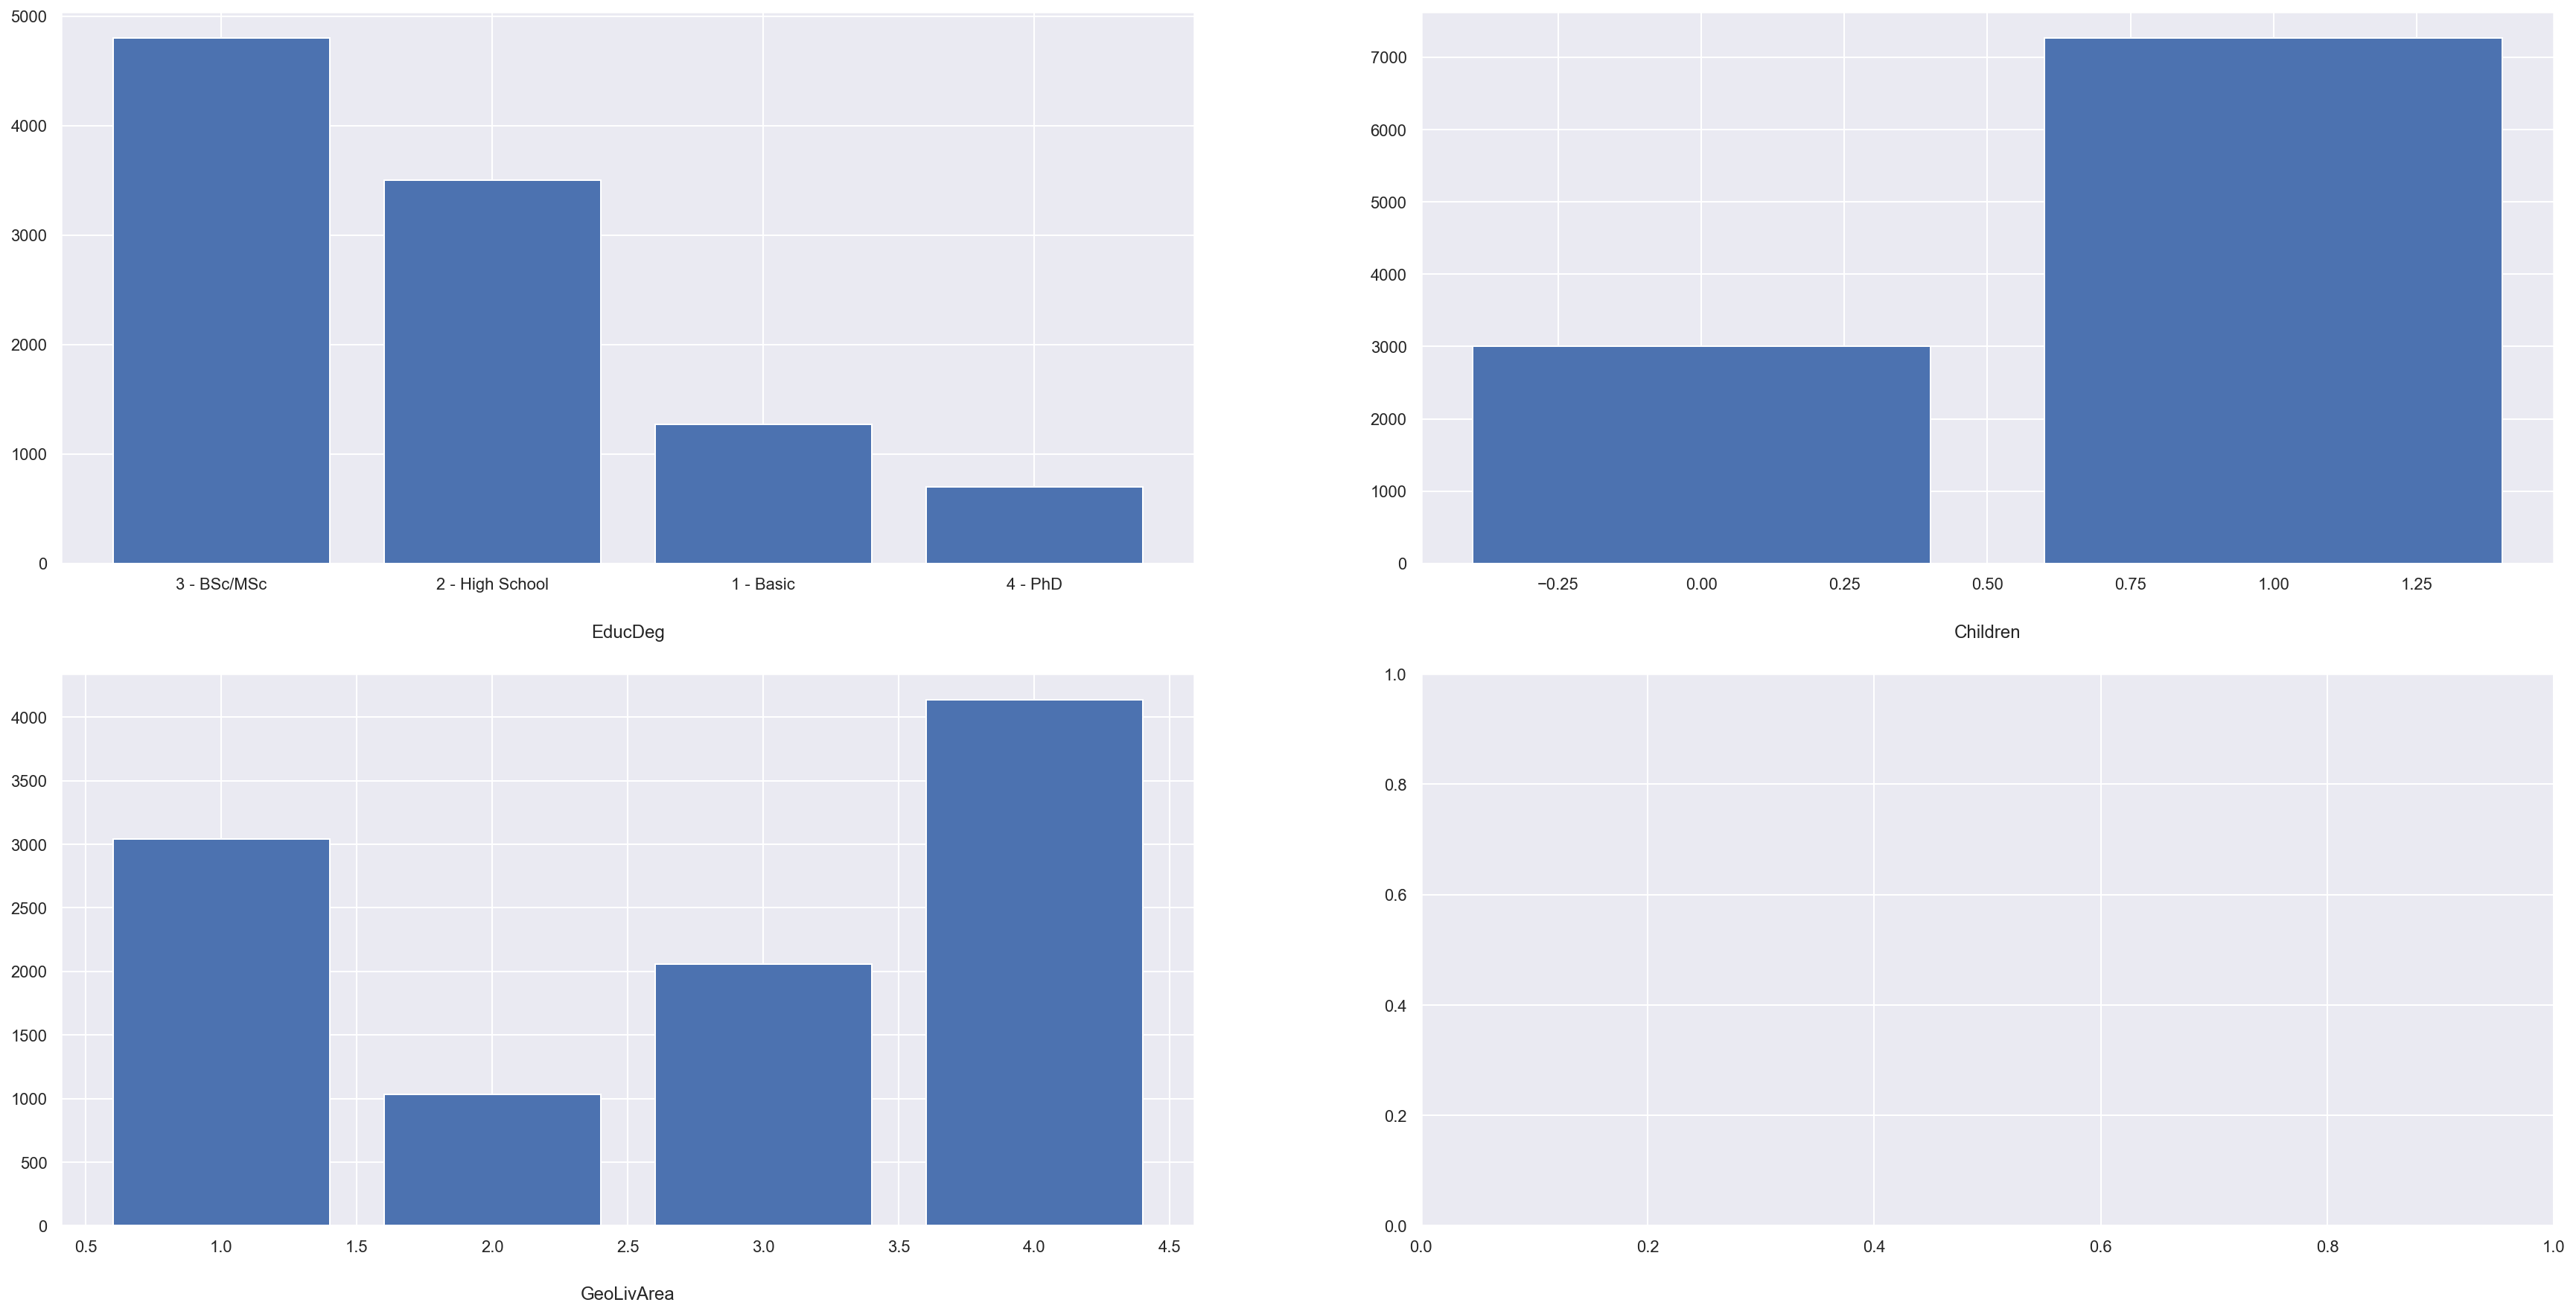

In [78]:
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(30, 15))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    ax.bar(height=list(df_filter1[feat].value_counts()), x=list(df[feat].value_counts().index))
    ax.set_title(feat, y=-0.15)
plt.show()

In [79]:
# removing outliers using a threshold by observing the histogram and box plot
filters1 = (
    (df_filter1['MonthSal']<=5000)
    &
    (df_filter1['CustMonVal']<=1500)
    &
    (df_filter1['CustMonVal'] >= -1000)
    &
    (df_filter1['ClaimsRate']<=30)
    &
    (df_filter1['PremMotor']<=700)
    &
    (df_filter1['PremHousehold']<=1250)
    &
    (df_filter1['PremHealth']<=400)
    &
    (df_filter1['PremLife']<=270)
    &
    (df_filter1['PremWork']<=350)
        
)

df_filter = df_filter1[filters1]

In [80]:
print('Percentage of data kept after removing outliers:', np.round(df_filter.shape[0] / df.shape[0], 4)*100)

Percentage of data kept after removing outliers: 98.9


<hr>
<a class="anchor" id="removingoutliers3">
    
# 5.4. Removing Outliers with IQR
    
</a>

<hr>
<a class="anchor" id="removingoutliers4">
    
# 5.4. Removing Outliers with Z-score
    
</a>

<hr>
<a class="anchor" id="removingoutliers5">
    
# 5.3. Removing Outliers with DBSCAN
    
</a>

<hr>
<a class="anchor" id="relandredun">
    
# 6. Relavancy and Redundancy 
    
</a>

<hr>
<a class="anchor" id="relbetvars">
    
# 6.1. Relation Between Variables 
    
</a>

In [ ]:
# Pairwise Relationship of Numerical Variables after the outlier removal
sns.set()

# Setting pairplot
sns.pairplot(df_filter[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

<hr>
<a class="anchor" id="correlation">
    
# 6.2. Correlation 
    
</a>

In [81]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.1')
    plt.show()


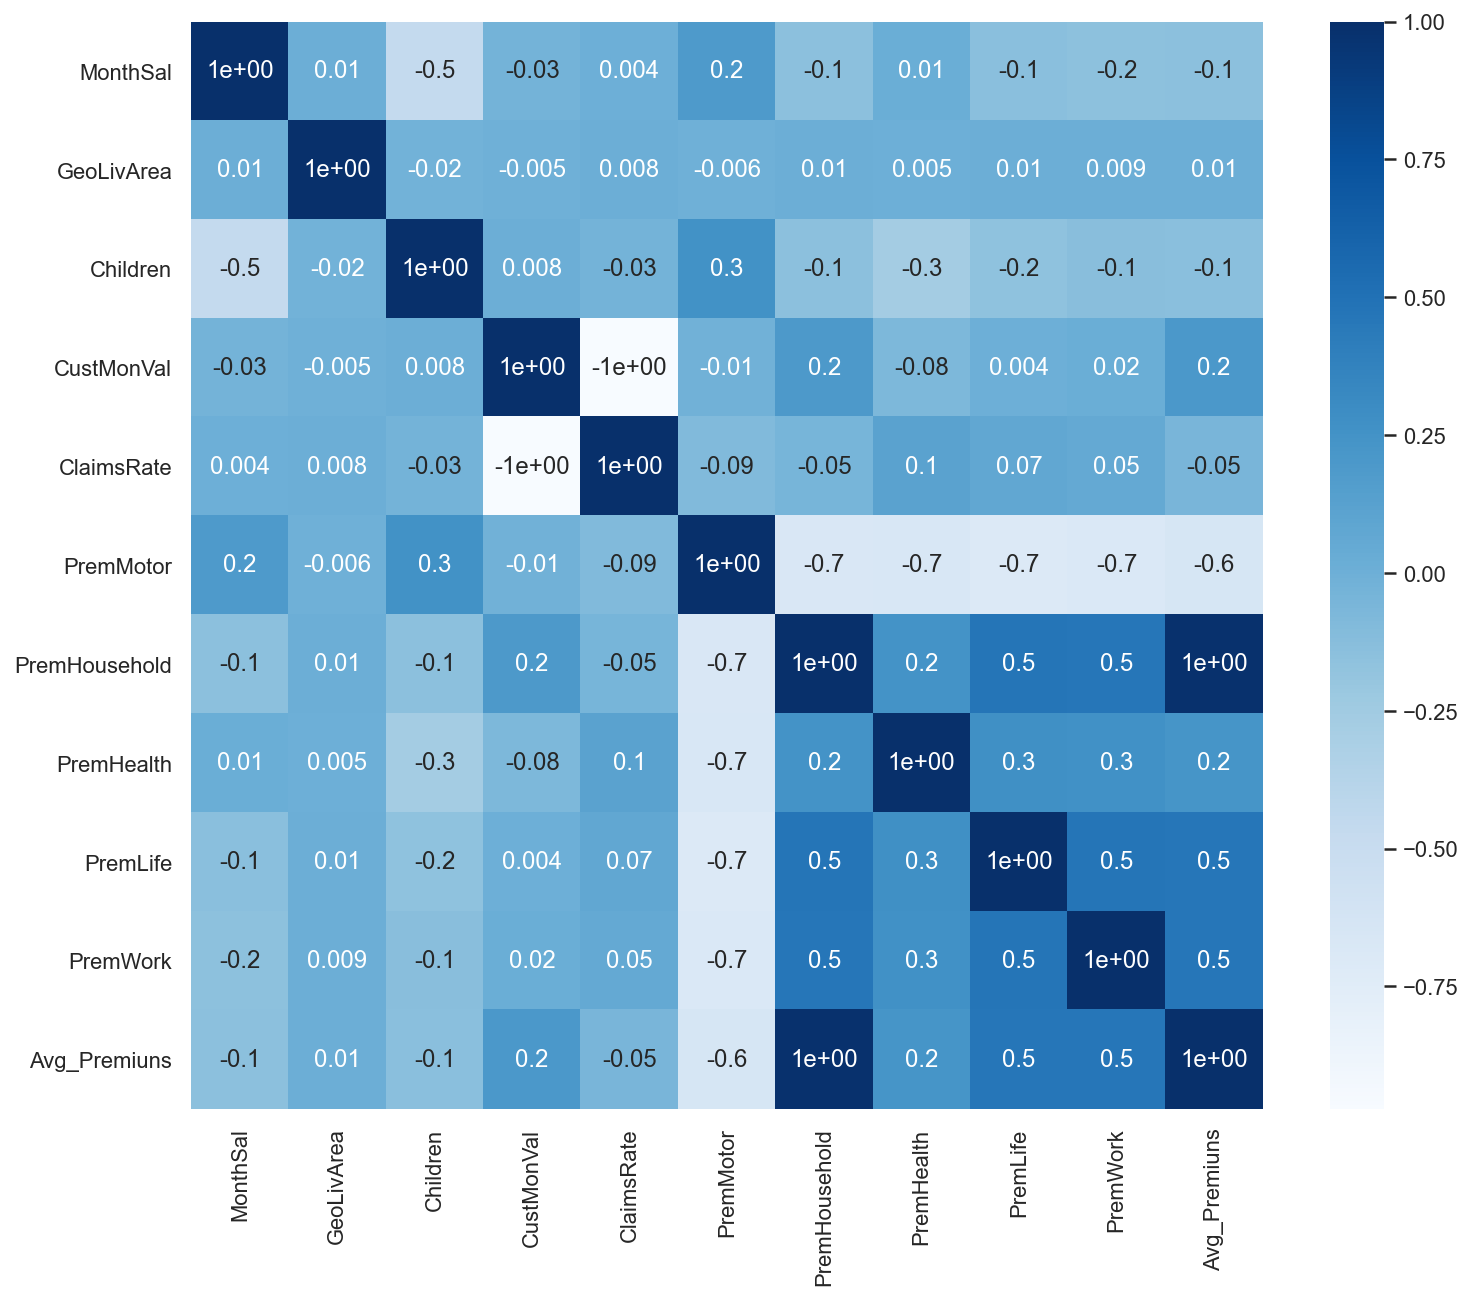

In [82]:
# we use spearman because doesn`t seem to exist any linear relation between variables
cor_heatmap(df_filter.corr(method ='spearman'))


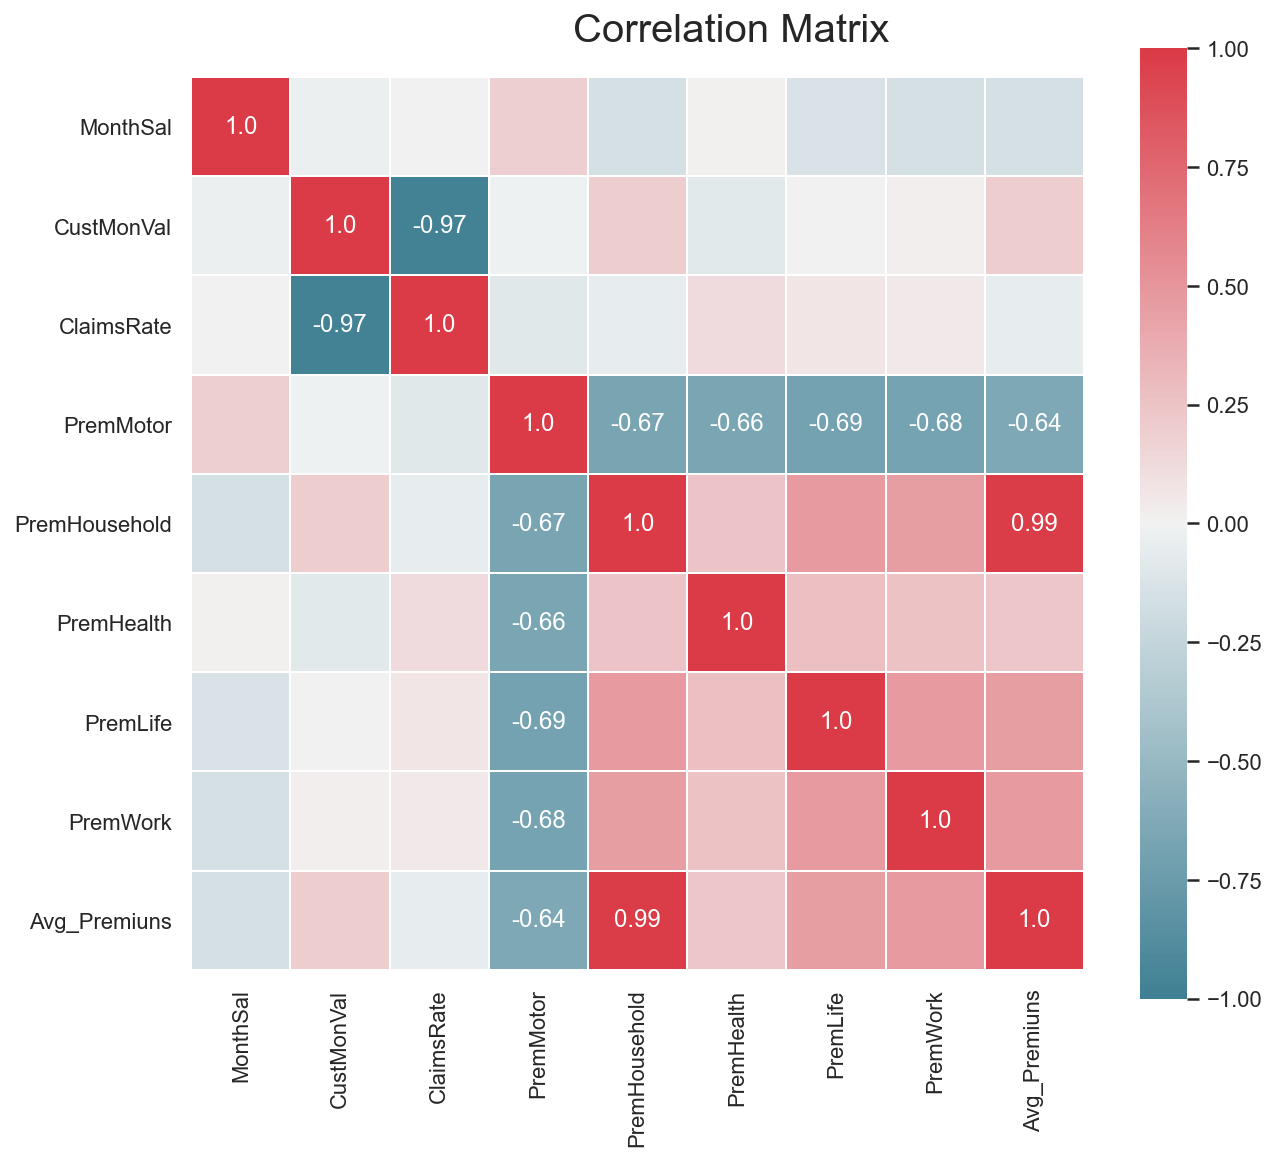

In [83]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df_filter[metric_features].corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [ ]:
# variable premhousehold probably the greatest value in the mean spend in premiuns therefor the big correlation
# custmonval and claimsrate are highly corrolated

In [271]:
df_filter.drop(columns = 'GeoLivArea', inplace = True)

C:\Users\tomas\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [272]:
# df_filter.drop(columns = 'CustMonVal', inplace = True)

In [273]:
non_metric_features.remove('GeoLivArea')
# metric_features.remove('CustMonVal')

In [274]:
df_filter.head(3)

,EducDeg,MonthSal,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns
CustID,,,,,,,,,,,
1.0,b'2 - High School',2177.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,133.112
2.0,b'2 - High School',677.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,182.192
3.0,b'1 - Basic',2277.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,148.120


<hr>
<a class="anchor" id="normalization">
    
# 7. Normalization 
    
</a>

In [275]:
df_minmax = df_filter.copy()

In [276]:
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_minmax[metric_features])

In [277]:
df_minmax[metric_features] = scaled_feat
df_minmax.head()

,EducDeg,MonthSal,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns
CustID,,,,,,,,,,,
1.0,b'2 - High School',0.395538,1.0,0.424429,0.090069,0.644732,0.117631,0.370693,0.196443,0.082111,0.251630
2.0,b'2 - High School',0.073788,1.0,0.148268,0.258661,0.138411,0.374105,0.296614,0.732814,0.335749,0.449941
3.0,b'1 - Basic',0.416988,0.0,0.491137,0.064665,0.356778,0.228104,0.316314,0.339529,0.315541,0.312271
4.0,b'3 - BSc/MSc',0.164307,1.0,0.209820,0.228637,0.316614,0.090137,0.782183,0.153997,0.114654,0.199200
5.0,b'3 - BSc/MSc',0.306735,1.0,0.237981,0.207852,0.581559,0.093526,0.461151,0.093766,0.151916,0.222280


In [278]:
# Checking max and min of minmaxed variables
df_minmax[metric_features].describe().round(2)

,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns
count,10183.00,10183.00,10183.00,10183.00,10183.00,10183.00,10183.00,10183.00,10183.00
mean,0.47,0.34,0.16,0.51,0.21,0.43,0.17,0.15,0.32
std,0.21,0.14,0.07,0.23,0.17,0.18,0.16,0.13,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.30,0.21,0.09,0.34,0.09,0.28,0.06,0.06,0.22
50%,0.47,0.32,0.17,0.51,0.16,0.41,0.12,0.11,0.28
75%,0.63,0.43,0.23,0.70,0.27,0.55,0.23,0.19,0.38
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [279]:
df_standard = df.copy()

In [280]:
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df_standard[metric_features])

In [281]:
df_standard[metric_features] = scaled_feat
df_standard.head()

,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns
CustID,,,,,,,,,,,,
1.0,b'2 - High School',-0.285319,1.0,1.0,0.104371,-0.120944,0.356343,-0.371495,-0.085147,0.112530,-0.472709,-0.211570
2.0,b'2 - High School',-1.583607,4.0,1.0,-0.158822,0.129328,-1.054121,0.583611,-0.185461,3.232531,1.266349,0.309092
3.0,b'1 - Basic',-0.198767,3.0,0.0,0.167947,-0.158656,-0.445815,0.039903,-0.158785,0.944840,1.127793,-0.052359
4.0,b'3 - BSc/MSc',-1.218355,4.0,1.0,-0.100160,0.084759,-0.557701,-0.473883,0.472072,-0.134371,-0.249578,-0.349225
5.0,b'3 - BSc/MSc',-0.643647,4.0,1.0,-0.073321,0.053904,0.180360,-0.461262,0.037346,-0.484729,0.005902,-0.288629


In [282]:
# Checking mean and variance of standardized variables
df_standard[metric_features].describe().round(2)

,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns
count,10296.00,10296.00,10296.00,10296.00,10296.00,10296.00,10296.00,10296.00,10296.00
mean,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.88,-85.24,-0.25,-1.44,-0.81,-0.59,-1.03,-1.04,-0.87
25%,-0.69,-0.10,-0.12,-0.52,-0.46,-0.20,-0.67,-0.59,-0.29
50%,-0.00,0.00,-0.01,-0.01,-0.22,-0.03,-0.34,-0.30,-0.14
75%,0.68,0.11,0.08,0.51,0.23,0.16,0.32,0.29,0.13
max,45.62,6.01,87.58,53.43,70.45,95.01,7.54,37.95,60.61


In [283]:
df_final = df_standard.copy()

<hr>
<a class="anchor" id="ohc">
    
# 8. One Hot Encodindg 
    
</a>

In [284]:
df_ohc = df_final.copy()

In [285]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop = 'first')
ohc_feat = ohc.fit_transform(df_ohc[non_metric_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df.head(15)

,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',x1_1.0
CustID,,,,
1.0,1.0,0.0,0.0,1.0
2.0,1.0,0.0,0.0,1.0
3.0,0.0,0.0,0.0,0.0
4.0,0.0,1.0,0.0,1.0
5.0,0.0,1.0,0.0,1.0
6.0,1.0,0.0,0.0,1.0
7.0,1.0,0.0,0.0,0.0
8.0,1.0,0.0,0.0,1.0
9.0,0.0,1.0,0.0,1.0


In [286]:
# Reassigning df to contain ohc variables
df_ohc = pd.concat([df_ohc.drop(columns=non_metric_features), ohc_df], axis=1)
df_ohc.head()

,MonthSal,GeoLivArea,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',x1_1.0
CustID,,,,,,,,,,,,,,
1.0,-0.285319,1.0,0.104371,-0.120944,0.356343,-0.371495,-0.085147,0.112530,-0.472709,-0.211570,1.0,0.0,0.0,1.0
2.0,-1.583607,4.0,-0.158822,0.129328,-1.054121,0.583611,-0.185461,3.232531,1.266349,0.309092,1.0,0.0,0.0,1.0
3.0,-0.198767,3.0,0.167947,-0.158656,-0.445815,0.039903,-0.158785,0.944840,1.127793,-0.052359,0.0,0.0,0.0,0.0
4.0,-1.218355,4.0,-0.100160,0.084759,-0.557701,-0.473883,0.472072,-0.134371,-0.249578,-0.349225,0.0,1.0,0.0,1.0
5.0,-0.643647,4.0,-0.073321,0.053904,0.180360,-0.461262,0.037346,-0.484729,0.005902,-0.288629,0.0,1.0,0.0,1.0


In [287]:
df_final = df_ohc.copy()

<hr>
<a class="anchor" id="pca">
    
# 9. PCA 
    
</a>

In [288]:
df_pca = df_final.copy()

In [289]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca[metric_features])

In [290]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,2.344907e+00,0.000000,2.605199e-01,0.260520
2,1.993386e+00,-0.351521,2.214658e-01,0.481986
3,1.552450e+00,-0.440936,1.724777e-01,0.654463
4,9.257651e-01,-0.626685,1.028528e-01,0.757316
5,8.935867e-01,-0.032178,9.927776e-02,0.856594
6,6.750693e-01,-0.218517,7.500042e-02,0.931594
7,6.097367e-01,-0.065333,6.774194e-02,0.999336
8,5.973325e-03,-0.603763,6.636383e-04,1.000000
9,4.648705e-32,-0.005973,5.164726e-33,1.000000


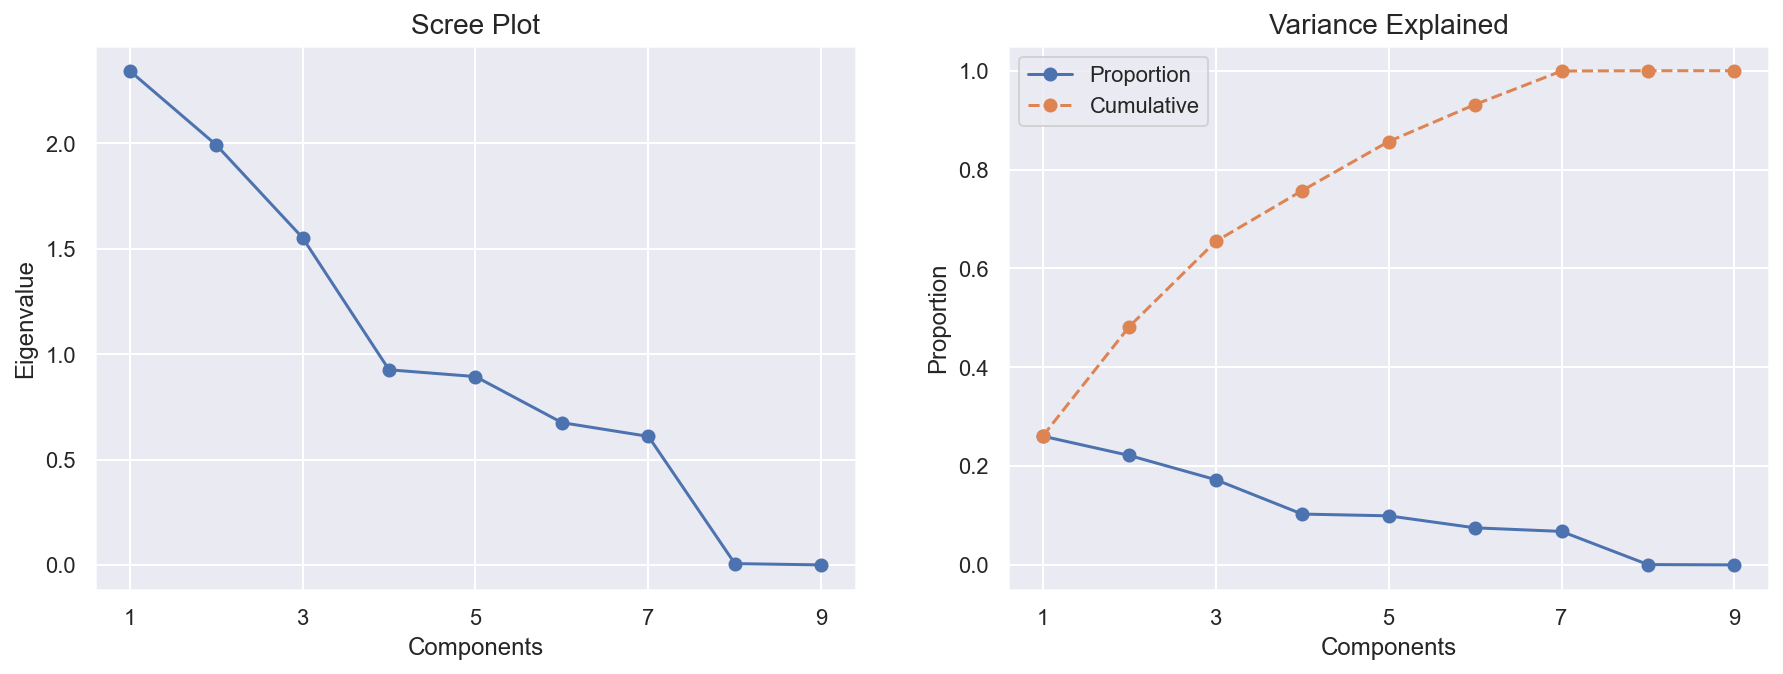

In [291]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [292]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=4) # 5 may be better???????
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

,PC0,PC1,PC2,PC3
CustID,,,,
1.0,-0.484585,-0.199524,-0.013925,-0.255295
2.0,2.785781,0.556176,-2.185314,-0.333650
3.0,0.959670,-0.097706,-1.004922,0.282313
4.0,0.012824,0.188902,-0.421636,-0.130315
5.0,-0.463276,0.061569,-0.067736,-0.283382
...,...,...,...,...
10292.0,-1.083993,0.000261,0.536520,0.233935
10293.0,2.353742,-0.491181,0.427723,-0.704073
10294.0,-0.928935,-0.367532,0.550259,-0.109898


In [293]:
# Reassigning df to contain pca variables
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

,MonthSal,GeoLivArea,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',x1_1.0,PC0,PC1,PC2,PC3
CustID,,,,,,,,,,,,,,,,,,
1.0,-0.285319,1.0,0.104371,-0.120944,0.356343,-0.371495,-0.085147,0.112530,-0.472709,-0.211570,1.0,0.0,0.0,1.0,-0.484585,-0.199524,-0.013925,-0.255295
2.0,-1.583607,4.0,-0.158822,0.129328,-1.054121,0.583611,-0.185461,3.232531,1.266349,0.309092,1.0,0.0,0.0,1.0,2.785781,0.556176,-2.185314,-0.333650
3.0,-0.198767,3.0,0.167947,-0.158656,-0.445815,0.039903,-0.158785,0.944840,1.127793,-0.052359,0.0,0.0,0.0,0.0,0.959670,-0.097706,-1.004922,0.282313
4.0,-1.218355,4.0,-0.100160,0.084759,-0.557701,-0.473883,0.472072,-0.134371,-0.249578,-0.349225,0.0,1.0,0.0,1.0,0.012824,0.188902,-0.421636,-0.130315
5.0,-0.643647,4.0,-0.073321,0.053904,0.180360,-0.461262,0.037346,-0.484729,0.005902,-0.288629,0.0,1.0,0.0,1.0,-0.463276,0.061569,-0.067736,-0.283382


In [294]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

,PC0,PC1,PC2,PC3
MonthSal,-0.329976,-0.043217,0.276214,0.590590
CustMonVal,0.100895,-0.992450,-0.041825,0.004866
ClaimsRate,-0.076533,0.992621,0.064908,-0.026359
PremMotor,-0.482659,-0.105733,0.587312,-0.369578
PremHousehold,0.743340,0.029833,0.137711,-0.380866
PremHealth,0.429469,0.022394,0.600053,0.486840
PremLife,0.594410,0.071834,-0.443960,0.107572
PremWork,0.598471,0.057736,-0.331658,0.180971
Avg_Premiuns,0.733696,0.002401,0.662556,-0.114797


In [295]:
# custmonval or claimsrate may need to be eliminated from the dataframe

In [296]:
df_final = df_pca.copy()

In [297]:
df_final.head()

,MonthSal,GeoLivArea,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',x1_1.0,PC0,PC1,PC2,PC3
CustID,,,,,,,,,,,,,,,,,,
1.0,-0.285319,1.0,0.104371,-0.120944,0.356343,-0.371495,-0.085147,0.112530,-0.472709,-0.211570,1.0,0.0,0.0,1.0,-0.484585,-0.199524,-0.013925,-0.255295
2.0,-1.583607,4.0,-0.158822,0.129328,-1.054121,0.583611,-0.185461,3.232531,1.266349,0.309092,1.0,0.0,0.0,1.0,2.785781,0.556176,-2.185314,-0.333650
3.0,-0.198767,3.0,0.167947,-0.158656,-0.445815,0.039903,-0.158785,0.944840,1.127793,-0.052359,0.0,0.0,0.0,0.0,0.959670,-0.097706,-1.004922,0.282313
4.0,-1.218355,4.0,-0.100160,0.084759,-0.557701,-0.473883,0.472072,-0.134371,-0.249578,-0.349225,0.0,1.0,0.0,1.0,0.012824,0.188902,-0.421636,-0.130315
5.0,-0.643647,4.0,-0.073321,0.053904,0.180360,-0.461262,0.037346,-0.484729,0.005902,-0.288629,0.0,1.0,0.0,1.0,-0.463276,0.061569,-0.067736,-0.283382


<hr>
<a class="anchor" id="clustering">
    
# 10. Clustering 
    
</a>

<hr>
<a class="anchor" id="hc">
    
# 10.1. Hierarchical Clustering
    
</a>

In [298]:
# voltar a fazer esta parte e pôr
df = df_final.copy()

In [299]:
# Splitting feature names into groups
non_metric_features = df.columns[df.columns.str.startswith('x')]
pc_features = df.columns[df.columns.str.startswith('PC')]
metric_features = df.columns[~df.columns.str.startswith('x') & ~df.columns.str.startswith('PC')]

In [300]:
# Performing HC
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(df[metric_features])

In [301]:
# Characterizing the clusters
df_concat = pd.concat((df, pd.Series(hc_labels, name='labels')), axis=1)
df_concat.groupby('labels').mean()

,MonthSal,GeoLivArea,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',x1_1.0,PC0,PC1,PC2,PC3
labels,,,,,,,,,,,,,,,,,,
0.0,-0.006170,2.745078,-0.000013,-0.000656,0.013550,0.004218,-0.018630,-0.030265,-0.029075,-0.008654,0.331146,0.477032,0.073195,0.720343,-0.033346,-0.004228,0.010402,-0.027891
1.0,-0.000687,2.707809,-0.000760,0.001707,-0.005531,0.004961,-0.009680,0.007193,0.008753,-0.003171,0.349250,0.463368,0.065678,0.699707,0.006143,0.002839,-0.013338,-0.002380
2.0,0.507501,4.000000,-0.003234,-0.011235,0.189813,-0.209120,-0.065605,-0.280142,-0.188972,-0.161074,0.000000,1.000000,0.000000,1.000000,-0.548551,-0.063092,0.211271,0.240842
3.0,1.219829,4.000000,0.142866,-0.117516,-0.556661,0.181715,0.139924,-0.381271,1.279405,0.074942,0.000000,0.000000,0.000000,0.000000,0.443290,-0.139595,-0.080278,1.154503
4.0,0.005661,2.686579,0.001652,-0.003310,0.002020,-0.014647,0.037071,0.007817,0.002501,0.014269,0.329749,0.470729,0.068100,0.714855,0.012553,-0.003010,0.022352,0.026996


In [302]:
# Computing SST
X = df[metric_features].values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [303]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        
        
        hclabels = cluster.fit_predict(df) #get cluster labels
        
        
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        
        
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        
        
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

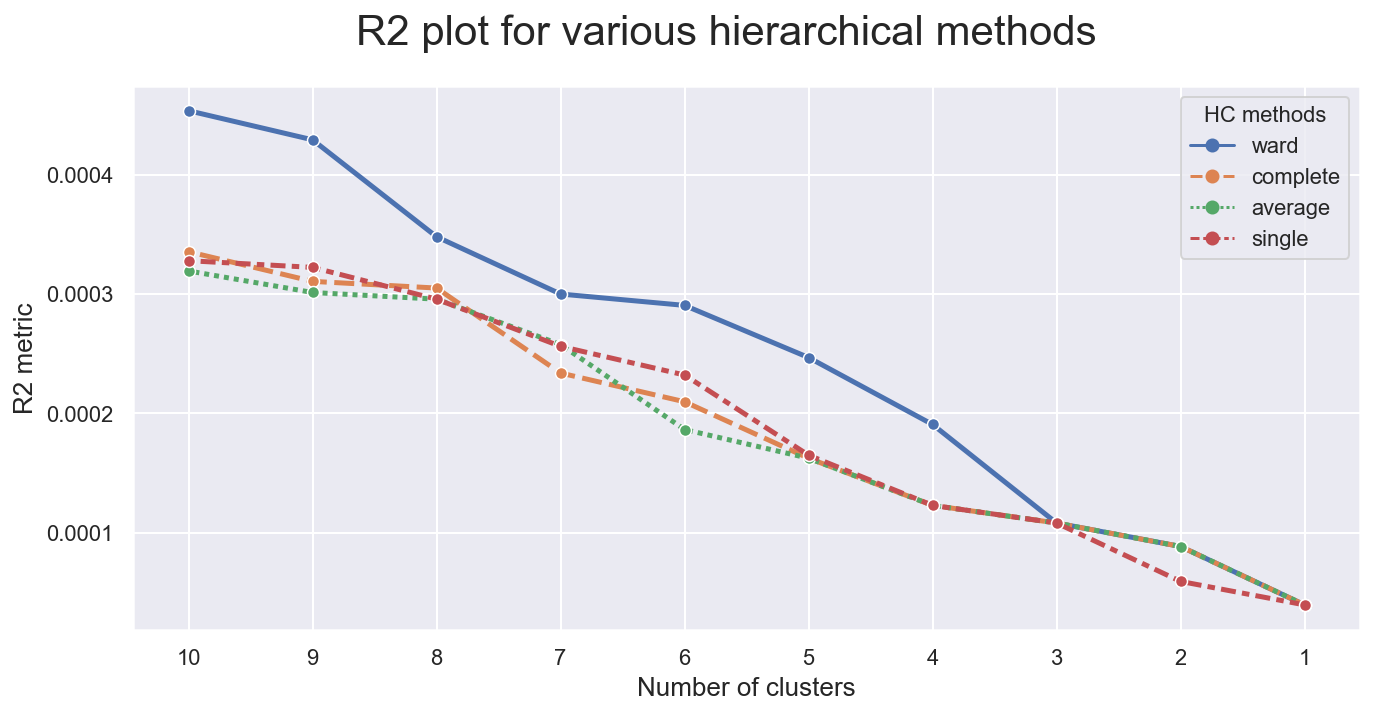

In [304]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df[metric_features], link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

### Defining the number of Clusters

In [305]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df[metric_features])

array([8239, 5478, 7092, ...,    4,    1,    0], dtype=int64)

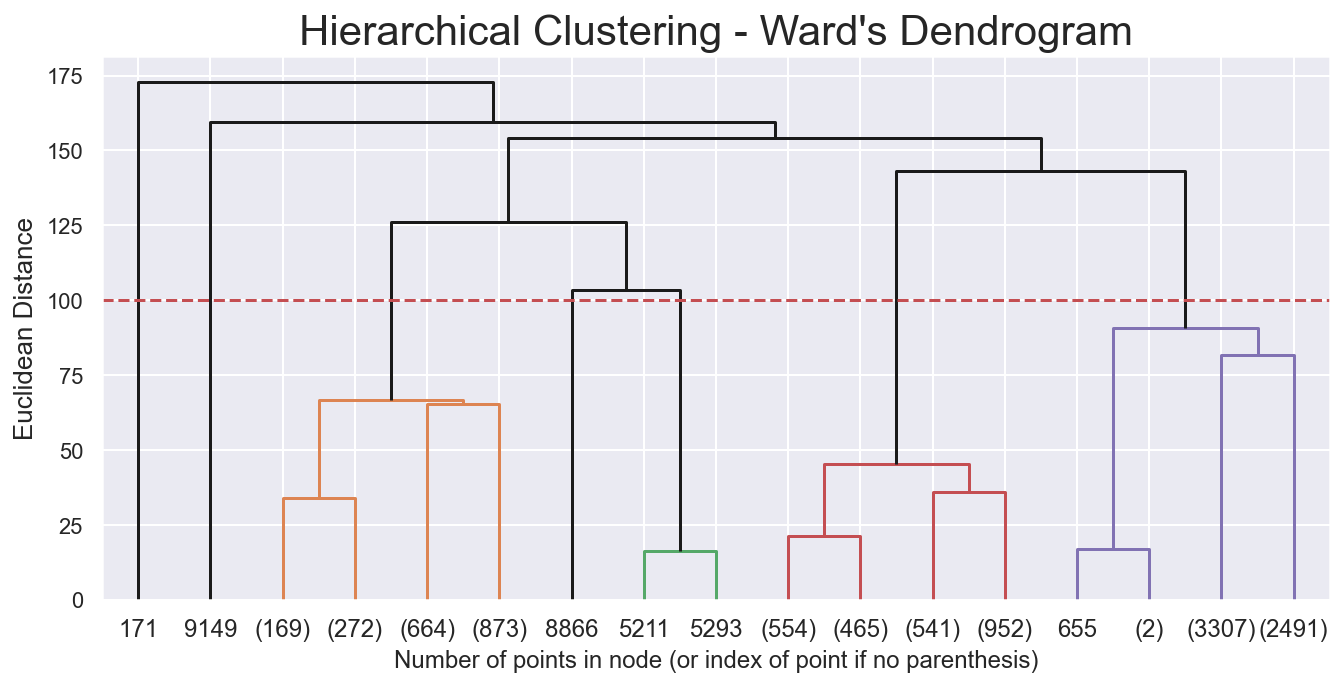

In [306]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

### Solution

In [307]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=4)
hc4_labels = hc4lust.fit_predict(df[metric_features])

In [308]:
# Characterizing the 4 clusters
df_concat = pd.concat((df, pd.Series(hc4_labels, name='labels')), axis=1)
df_concat.groupby('labels').mean()

,MonthSal,GeoLivArea,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',x1_1.0,PC0,PC1,PC2,PC3
labels,,,,,,,,,,,,,,,,,,
0.0,0.001231,2.701396,-0.000031,0.000191,-0.003250,-0.000962,0.004443,0.007381,0.006865,0.002097,0.343359,0.465592,0.066410,0.704283,0.008080,0.001072,-0.002557,0.006494
1.0,-0.006170,2.745078,-0.000013,-0.000656,0.013550,0.004218,-0.018630,-0.030265,-0.029075,-0.008654,0.331146,0.477032,0.073195,0.720343,-0.033346,-0.004228,0.010402,-0.027891
2.0,0.507501,4.000000,-0.003234,-0.011235,0.189813,-0.209120,-0.065605,-0.280142,-0.188972,-0.161074,0.000000,1.000000,0.000000,1.000000,-0.548551,-0.063092,0.211271,0.240842
3.0,1.219829,4.000000,0.142866,-0.117516,-0.556661,0.181715,0.139924,-0.381271,1.279405,0.074942,0.000000,0.000000,0.000000,0.000000,0.443290,-0.139595,-0.080278,1.154503


In [309]:
# 5 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc5lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=5)
hc5_labels = hc5lust.fit_predict(df[metric_features])

In [310]:
# Characterizing the 5 clusters
df_concat = pd.concat((df, pd.Series(hc5_labels, name='labels')), axis=1)
df_concat.groupby('labels').mean()

,MonthSal,GeoLivArea,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',x1_1.0,PC0,PC1,PC2,PC3
labels,,,,,,,,,,,,,,,,,,
0.0,-0.006170,2.745078,-0.000013,-0.000656,0.013550,0.004218,-0.018630,-0.030265,-0.029075,-0.008654,0.331146,0.477032,0.073195,0.720343,-0.033346,-0.004228,0.010402,-0.027891
1.0,-0.000687,2.707809,-0.000760,0.001707,-0.005531,0.004961,-0.009680,0.007193,0.008753,-0.003171,0.349250,0.463368,0.065678,0.699707,0.006143,0.002839,-0.013338,-0.002380
2.0,0.507501,4.000000,-0.003234,-0.011235,0.189813,-0.209120,-0.065605,-0.280142,-0.188972,-0.161074,0.000000,1.000000,0.000000,1.000000,-0.548551,-0.063092,0.211271,0.240842
3.0,1.219829,4.000000,0.142866,-0.117516,-0.556661,0.181715,0.139924,-0.381271,1.279405,0.074942,0.000000,0.000000,0.000000,0.000000,0.443290,-0.139595,-0.080278,1.154503
4.0,0.005661,2.686579,0.001652,-0.003310,0.002020,-0.014647,0.037071,0.007817,0.002501,0.014269,0.329749,0.470729,0.068100,0.714855,0.012553,-0.003010,0.022352,0.026996


<hr>
<a class="anchor" id="kmeans">
    
# 10.2. K-Means 
    
</a>

In [311]:
kmclust = KMeans(n_clusters=8, init='random', n_init=10, random_state=1)
# the fit method
kmclust.fit(df[metric_features])

KMeans(init='random', random_state=1)

In [312]:
# the predict method
kmclust.predict(df[metric_features])

array([1, 2, 6, ..., 1, 4, 1])

In [313]:
# the transform method
pd.DataFrame(kmclust.transform(df[metric_features]))

,0,1,2,3,4,5,6,7
0,50.225002,0.849327,4.085333,3.131071,1.477603,2.788592,2.964312,4.453538
1,50.082346,5.609203,1.470459,4.359195,4.434866,5.014960,3.566665,3.482493
2,50.128273,3.011841,2.321379,1.970091,2.097090,2.684220,1.626479,2.476655
3,50.381428,3.325895,3.640467,2.396813,3.263001,1.977031,1.130106,4.041713
4,50.237198,2.923767,3.968998,1.913851,3.183802,1.092649,1.147627,4.041302
...,...,...,...,...,...,...,...,...
10291,50.192227,0.895389,4.573049,2.180366,2.114489,1.763154,2.626190,4.674810
10292,48.578961,4.260365,4.012511,3.382467,3.353790,4.062775,3.137340,2.720066
10293,50.125049,0.489107,4.779466,3.086288,1.920610,2.694988,3.277413,4.888604
10294,49.991928,2.597741,2.892163,2.609294,1.431903,3.105222,2.164165,2.244544


In [314]:
# Better initialization method and provide more n_init
kmclust = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust.fit(df[metric_features])

KMeans(n_init=15, random_state=1)

In [315]:
kmclust.predict(df[metric_features])

array([1, 2, 2, ..., 1, 2, 1])

#### Defining the number of clusters

In [316]:
range_clusters = range(1, 11)

In [317]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df[metric_features])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

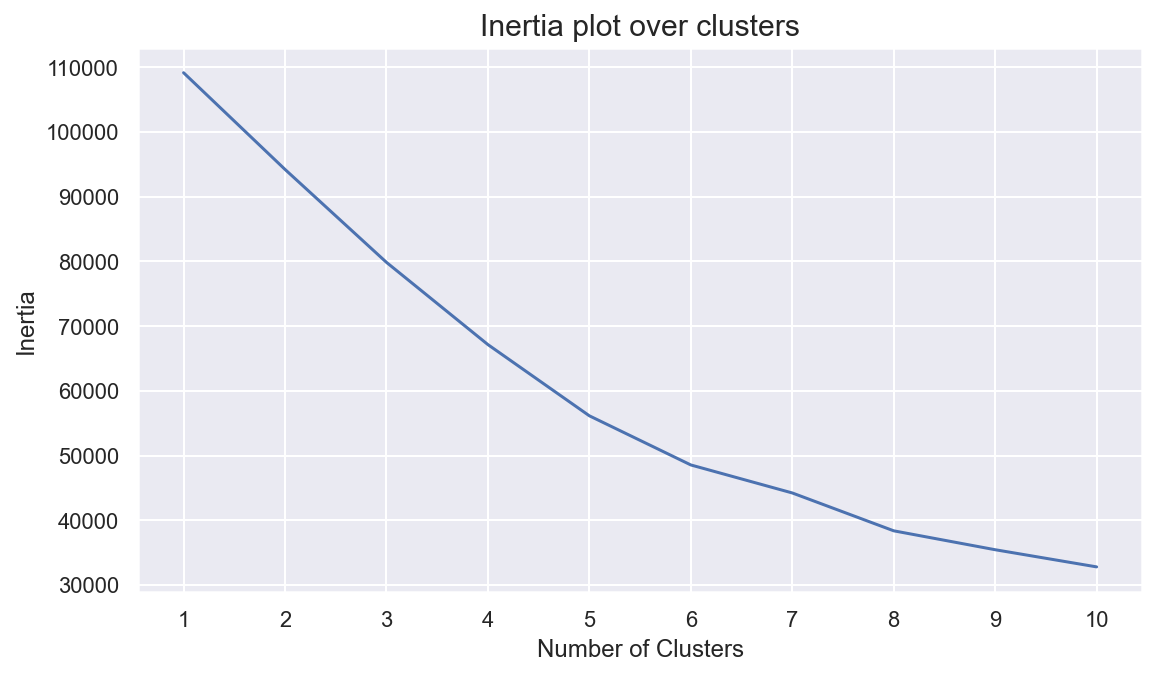

In [318]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(range_clusters,inertia)
plt.xticks(range_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title("Inertia plot over clusters", size=15)
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.9743294795217217
For n_clusters = 3, the average silhouette_score is : 0.2858641571413405
For n_clusters = 4, the average silhouette_score is : 0.2876072919384607
For n_clusters = 5, the average silhouette_score is : 0.3146122433146416
For n_clusters = 6, the average silhouette_score is : 0.31839169508909165
For n_clusters = 7, the average silhouette_score is : 0.31753469966403847
For n_clusters = 8, the average silhouette_score is : 0.31946065215772246
For n_clusters = 9, the average silhouette_score is : 0.2540166377117855
For n_clusters = 10, the average silhouette_score is : 0.252845280396558


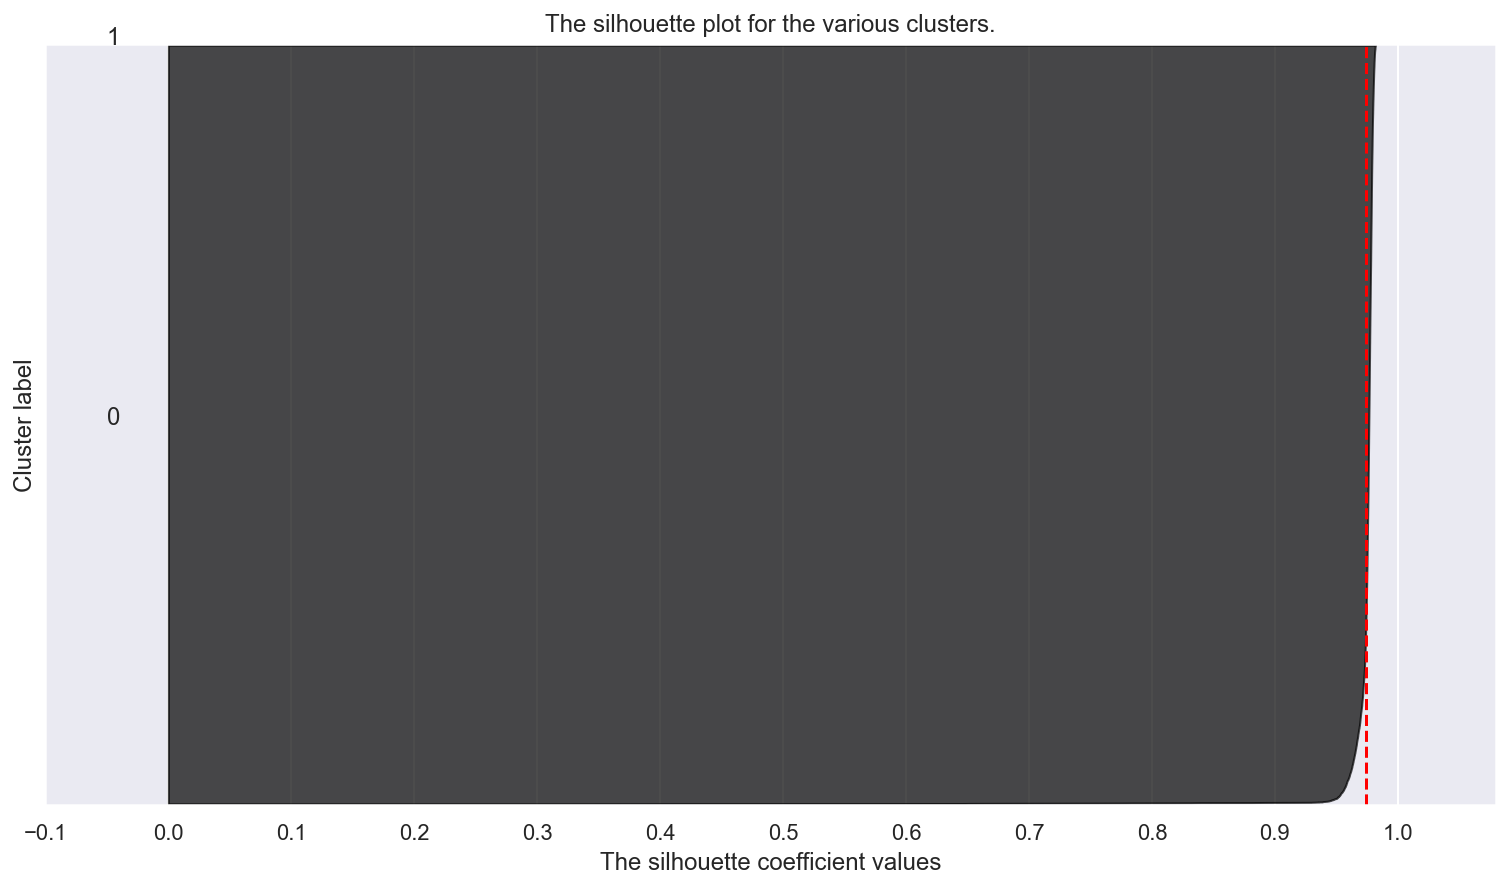

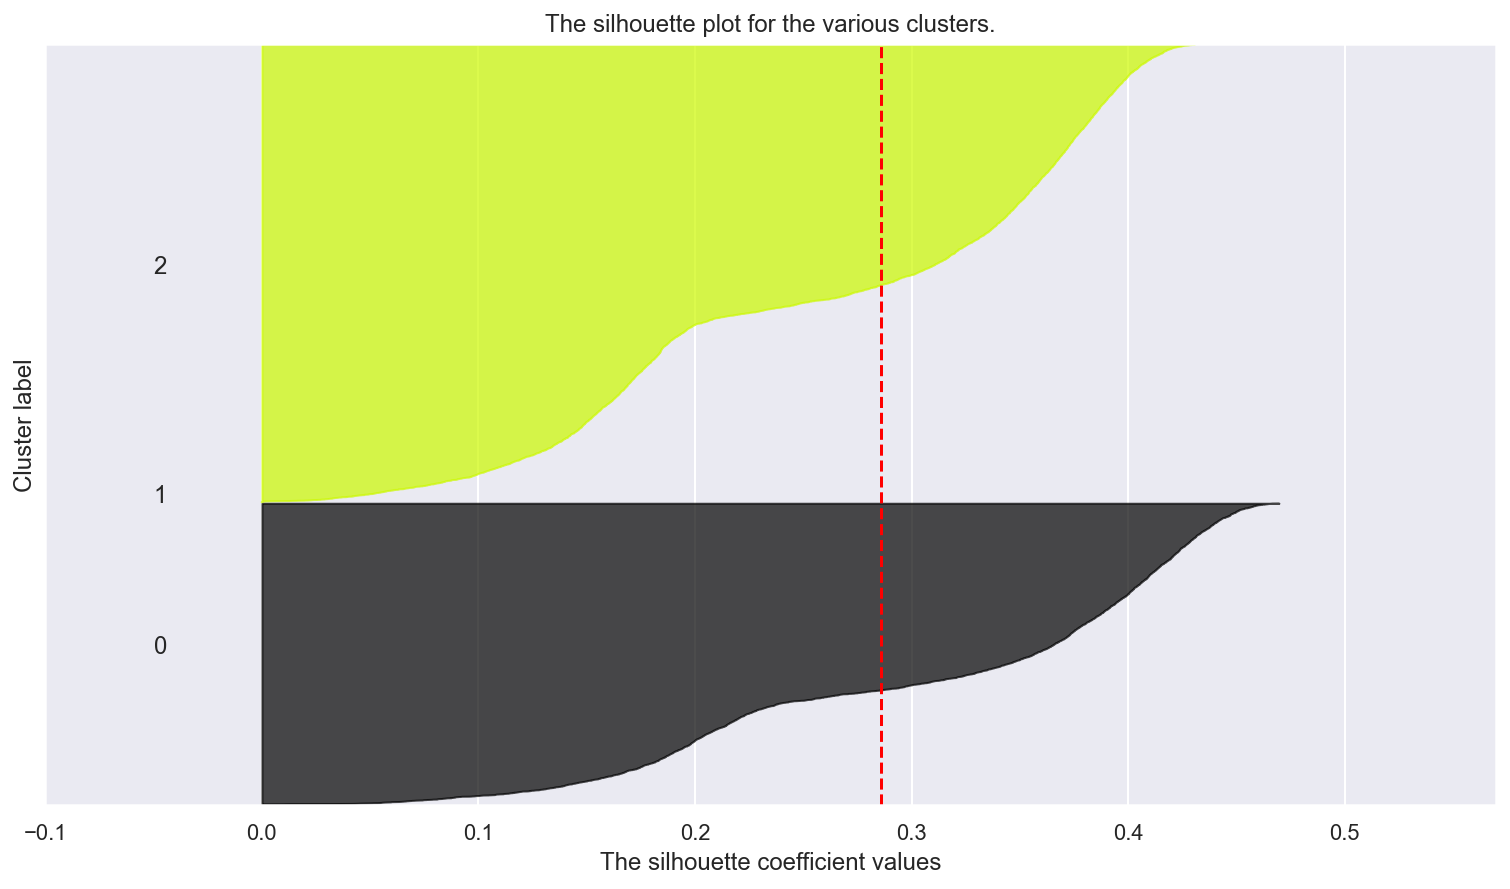

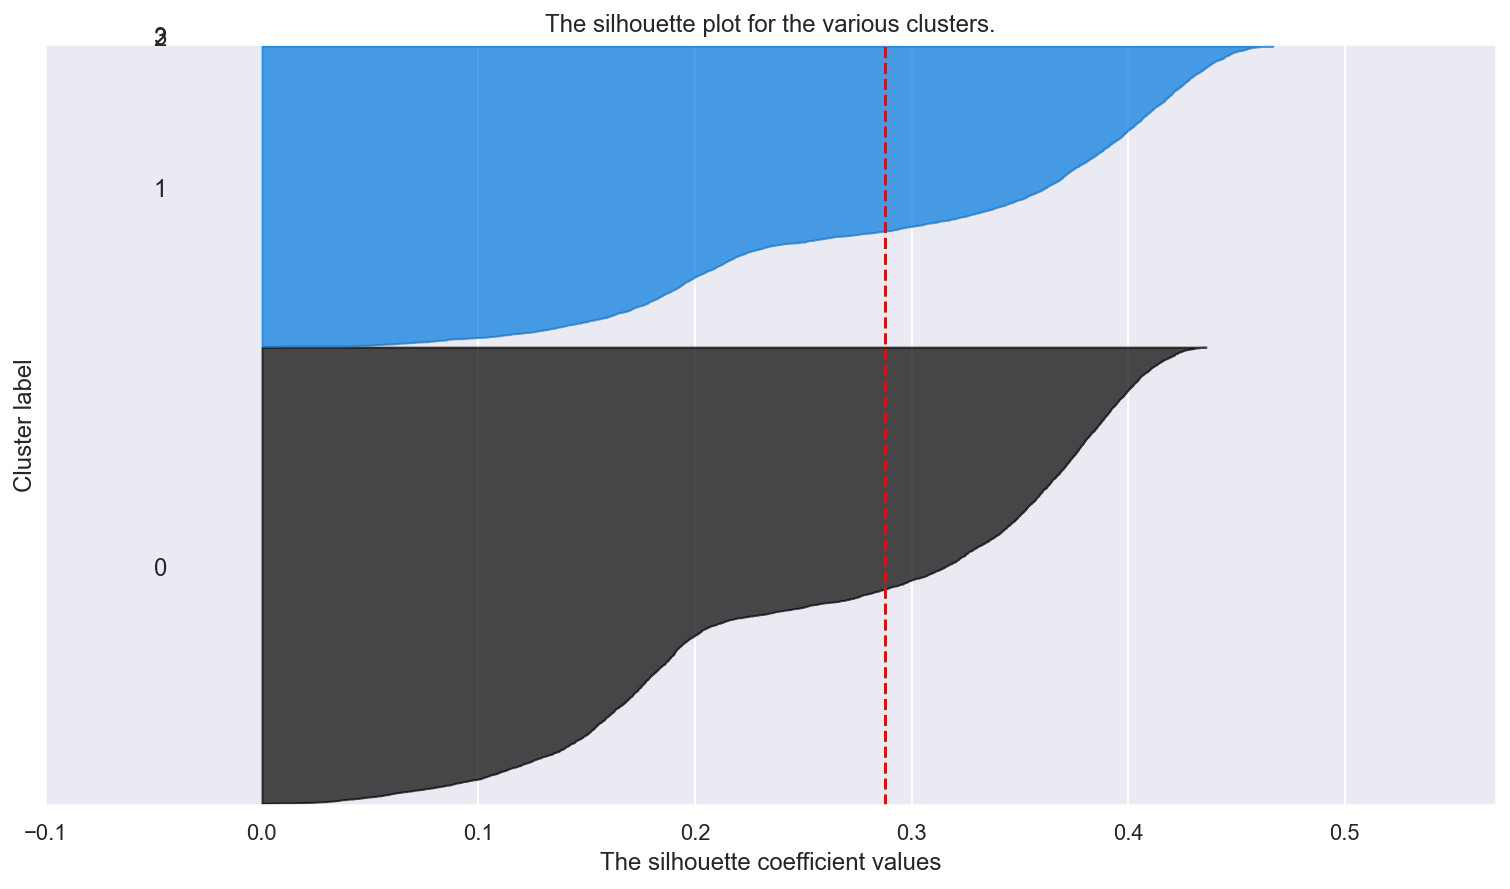

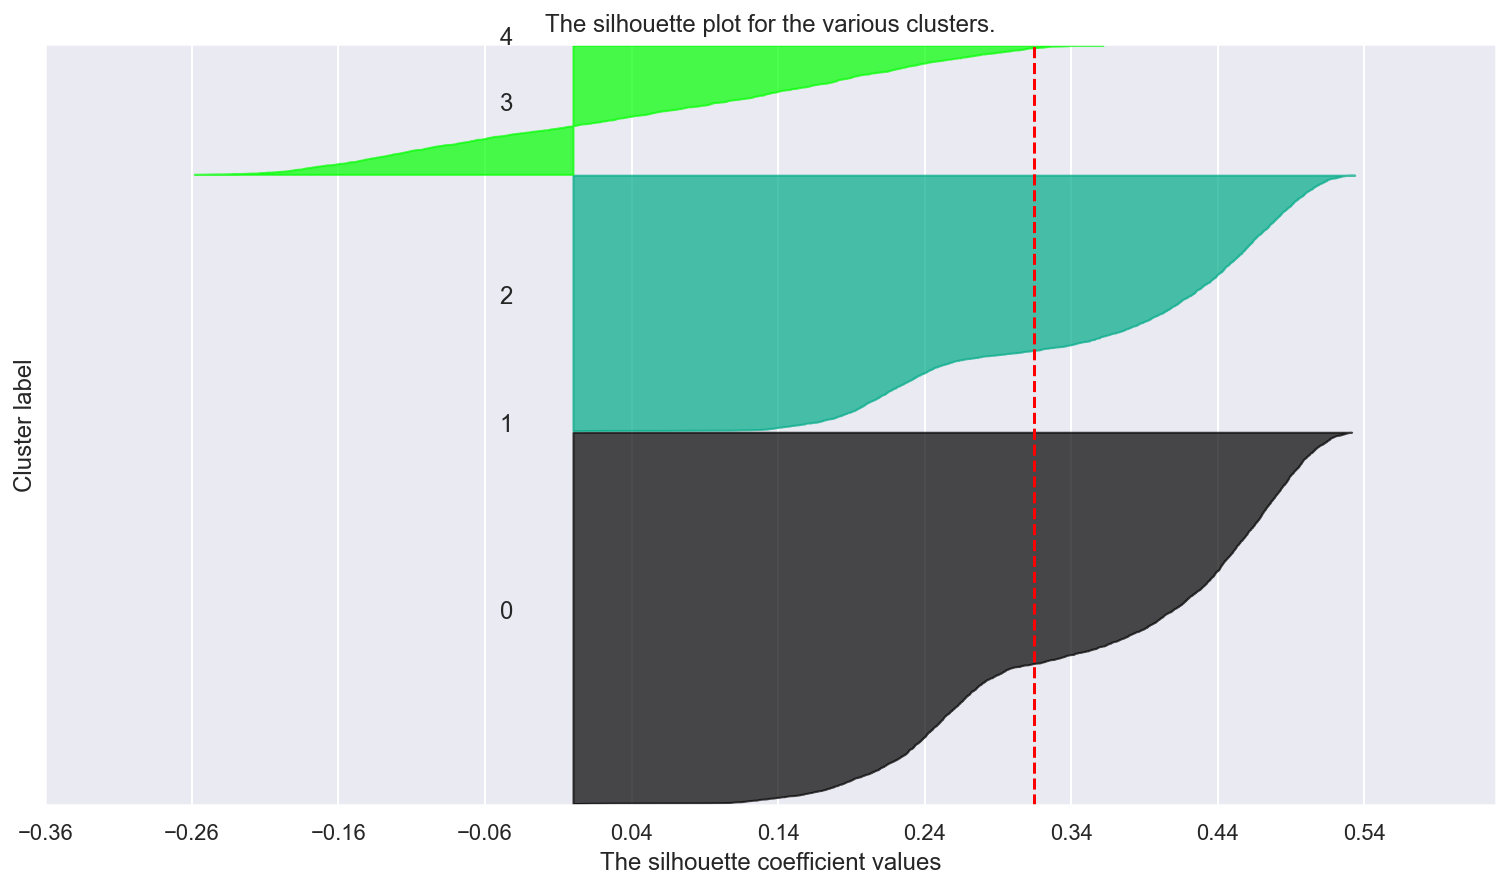

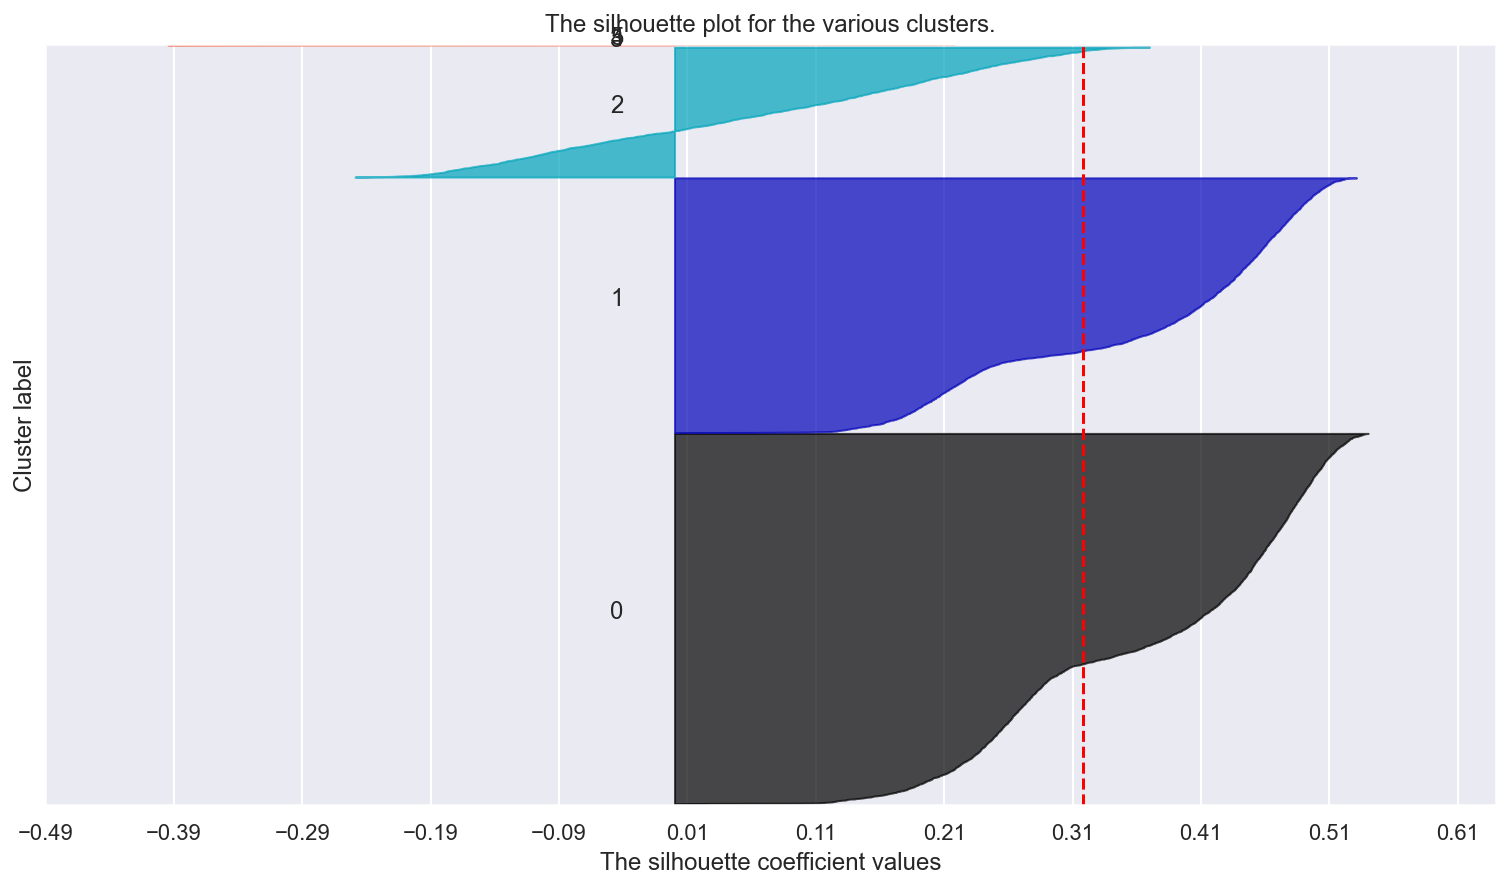

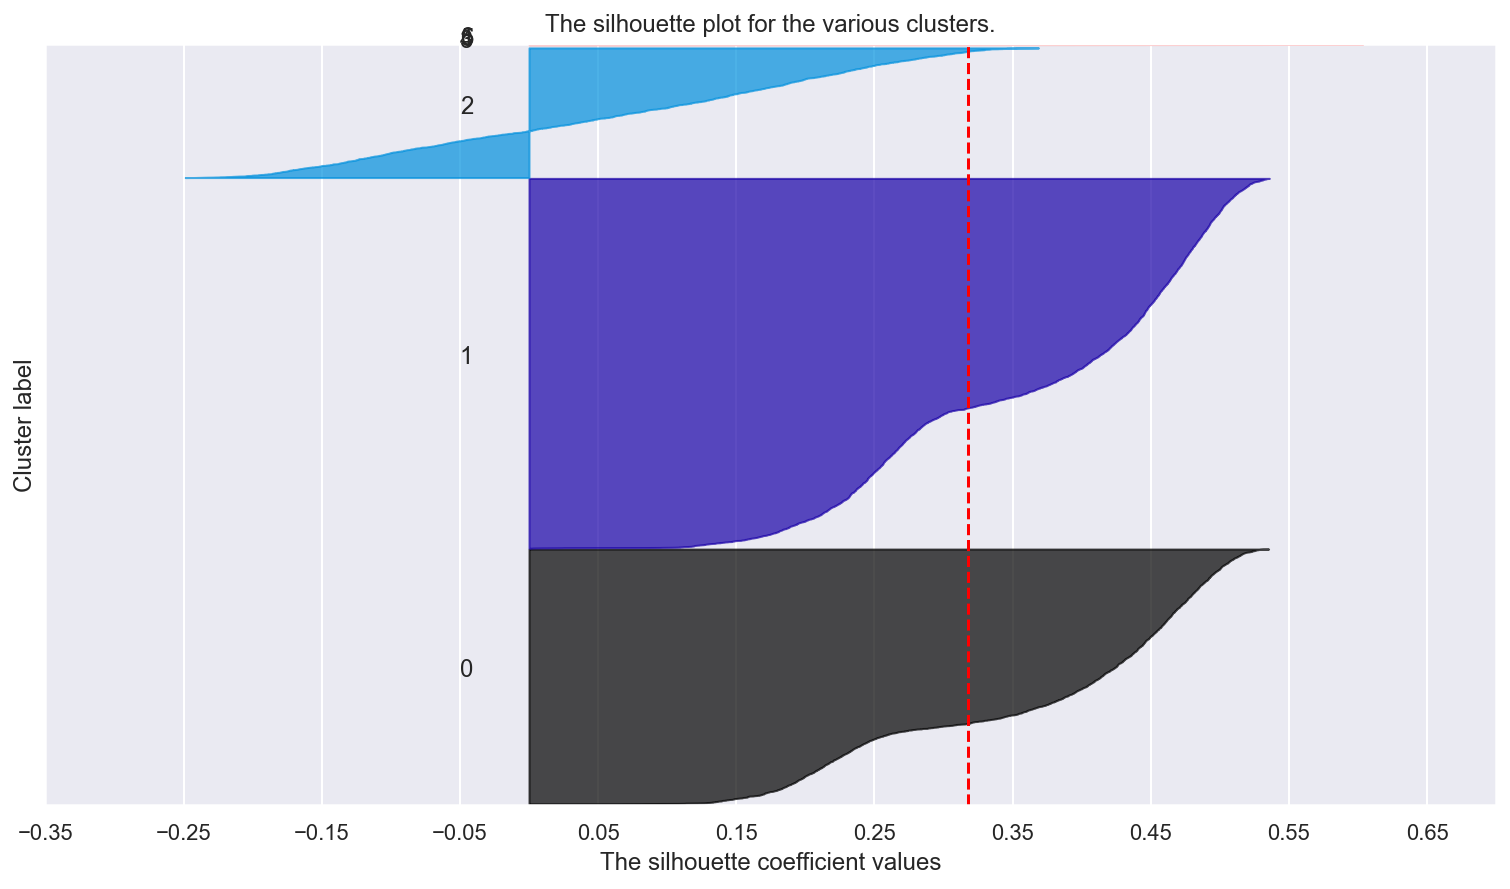

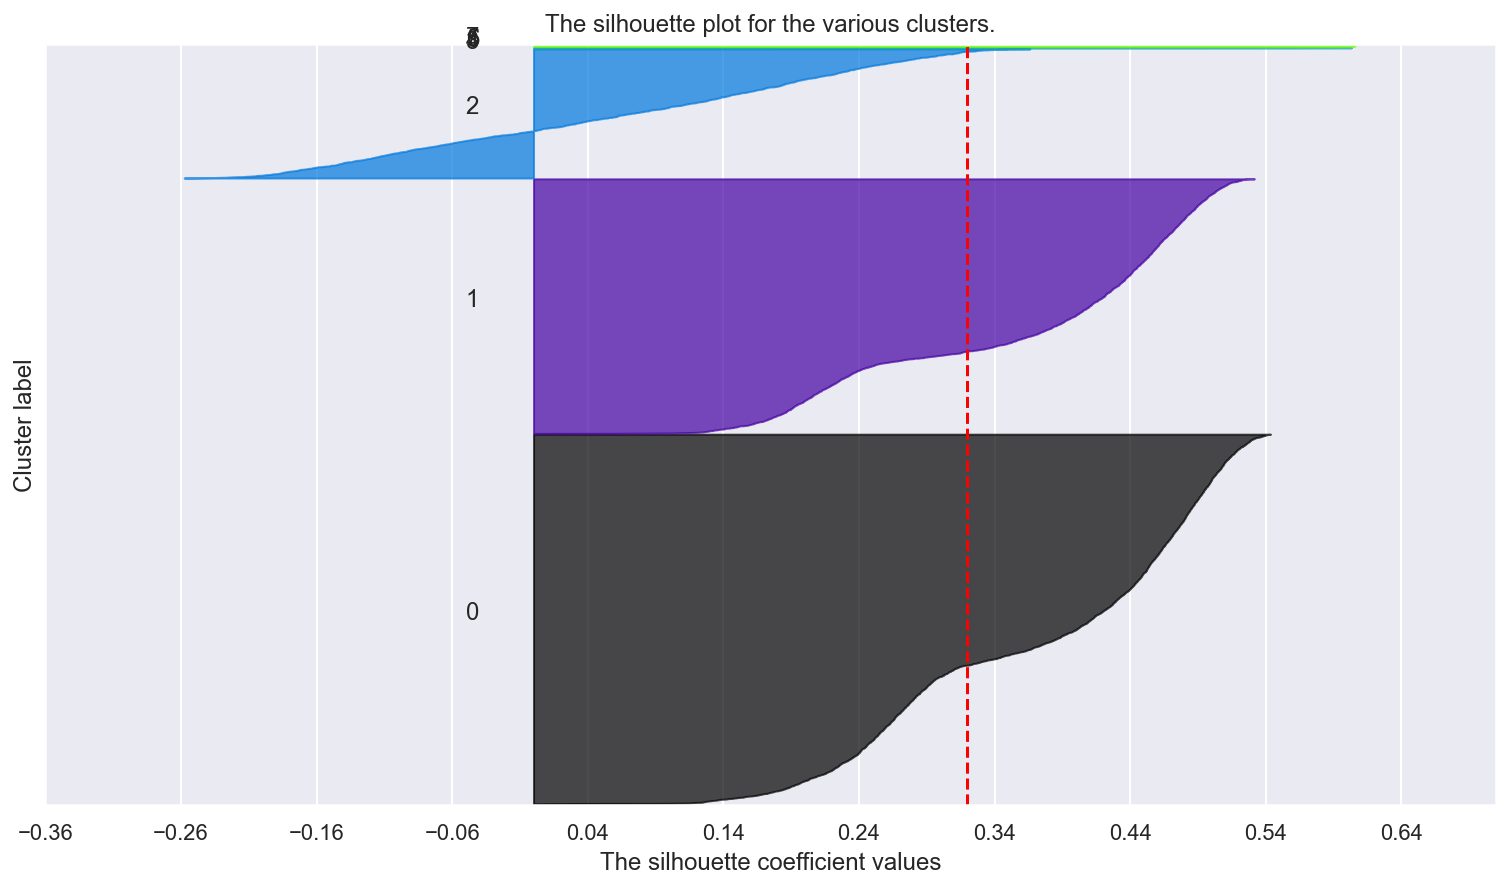

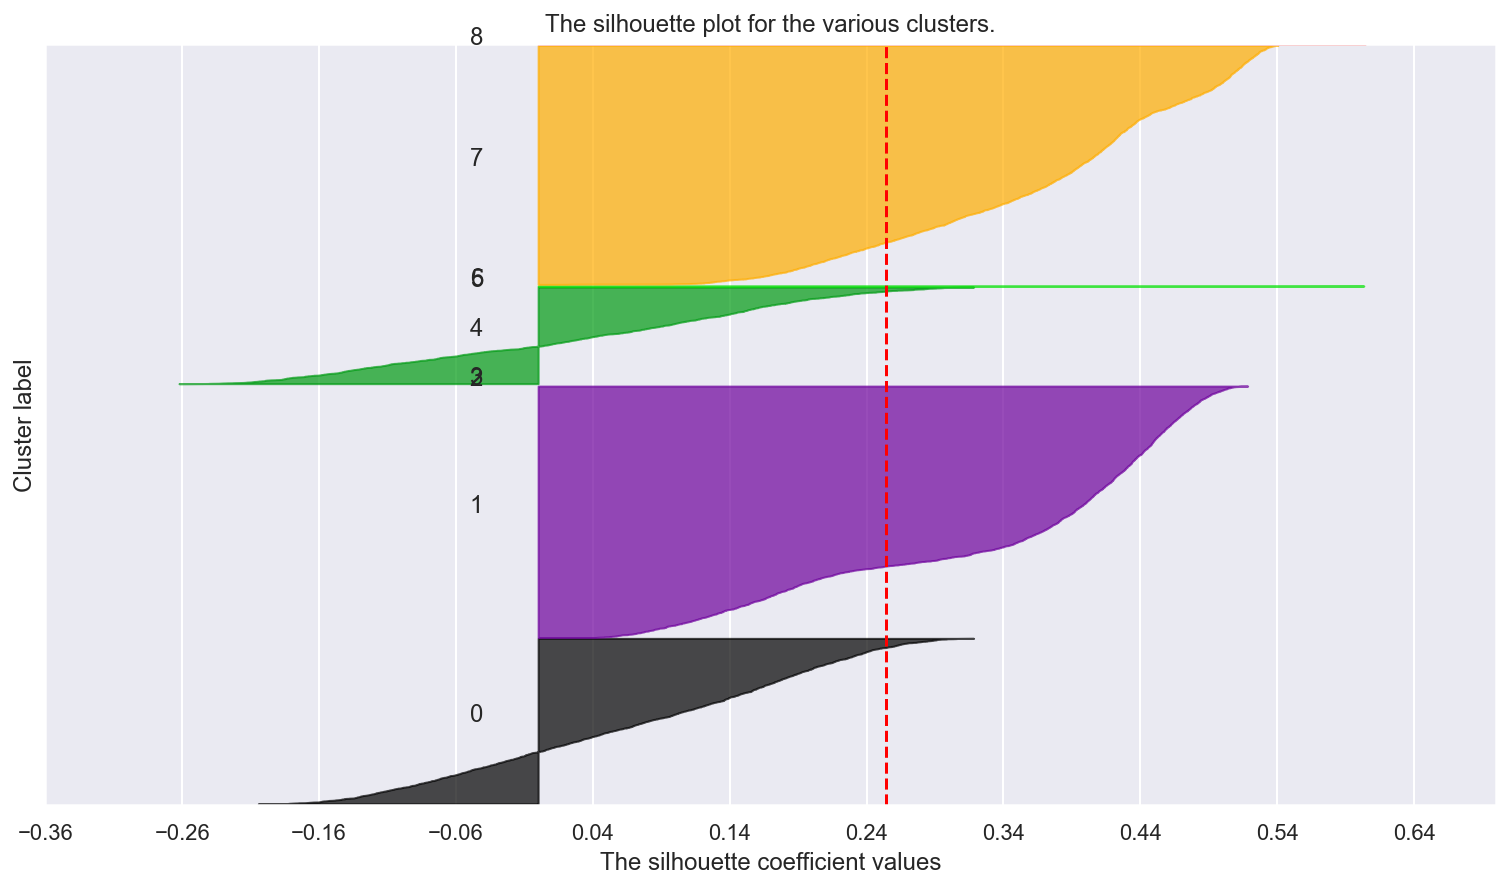

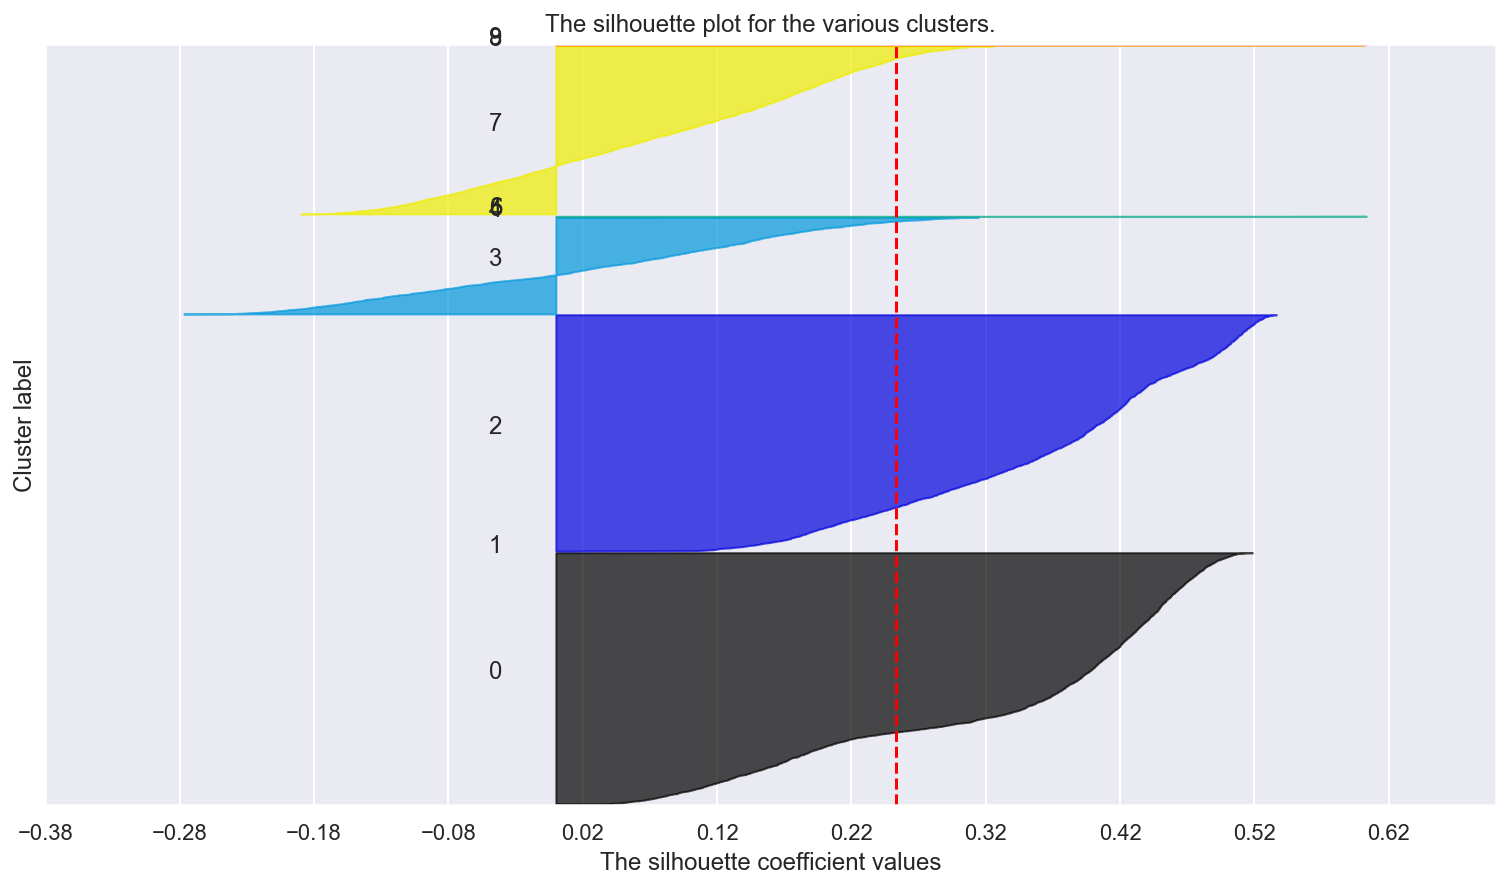

In [319]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df[metric_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

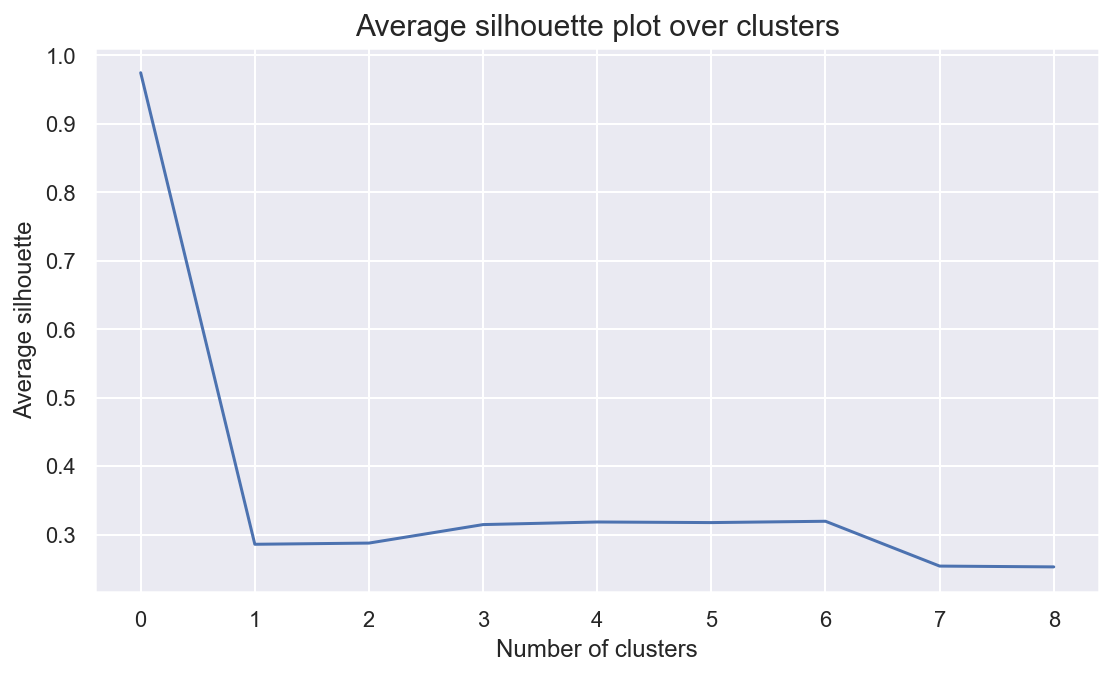

In [320]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

#### Final KMeans Clustering Solution

In [326]:
# final cluster solution
number_clusters = 7
kmclust_7 = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels_7 = kmclust_7.fit_predict(df[metric_features])
km_labels_7

array([0, 2, 2, ..., 0, 2, 0])

In [327]:
# Characterizing the final clusters
df_concat = pd.concat((df, pd.Series(km_labels_7, name='labels')), axis=1)
df_concat.groupby('labels').mean()

,MonthSal,GeoLivArea,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',x1_1.0,PC0,PC1,PC2,PC3
labels,,,,,,,,,,,,,,,,,,
0.0,0.028785,2.704088,0.004088,-0.006020,-0.001691,0.001247,0.025431,0.005636,-0.003618,0.016304,0.332182,0.470639,0.070524,0.708405,0.011223,-0.007264,0.025144,0.028884
1.0,-0.009811,2.701031,-0.007154,0.007858,-0.006060,-0.001570,-0.011610,0.005868,0.013351,-0.009139,0.349524,0.462530,0.063838,0.700634,0.002259,0.011919,-0.020652,-0.004942
2.0,-0.030627,2.745054,0.012101,-0.010392,0.020357,0.001980,-0.016765,-0.026927,-0.030467,-0.005919,0.334087,0.477106,0.073488,0.724138,-0.027438,-0.019251,0.008561,-0.043576
3.0,1.219829,4.000000,0.142866,-0.117516,-0.556661,0.181715,0.139924,-0.381271,1.279405,0.074942,0.000000,0.000000,0.000000,0.000000,0.443290,-0.139595,-0.080278,1.154503
4.0,0.507501,4.000000,-0.003234,-0.011235,0.189813,-0.209120,-0.065605,-0.280142,-0.188972,-0.161074,0.000000,1.000000,0.000000,1.000000,-0.548551,-0.063092,0.211271,0.240842
5.0,0.870156,2.000000,-0.118898,0.101901,0.077927,-0.217061,0.044479,-0.489383,0.114252,-0.136123,0.000000,0.000000,0.000000,1.000000,-0.528447,0.098414,0.307957,0.592260
6.0,0.160599,3.200000,0.061598,-0.029749,0.036000,0.132194,-0.028556,0.068777,-0.305897,0.070720,0.400000,0.600000,0.000000,0.800000,-0.043219,-0.078379,0.144344,-0.039186


In [328]:
# final cluster solution
number_clusters = 6
kmclust_6 = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels_6 = kmclust_6.fit_predict(df[metric_features])
km_labels_6

array([1, 2, 2, ..., 1, 2, 1])

In [338]:
# Characterizing the final clusters
df_concat = pd.concat((df, pd.Series(km_labels_6, name='labels')), axis=1)
df_concat.groupby('labels').mean()

,MonthSal,GeoLivArea,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Avg_Premiuns,x0_b'2 - High School',x0_b'3 - BSc/MSc',x0_b'4 - PhD',x1_1.0,PC0,PC1,PC2,PC3
labels,,,,,,,,,,,,,,,,,,
0.0,-0.010609,2.701605,-0.007193,0.007893,-0.006329,-0.001264,-0.011480,0.006250,0.012997,-0.008948,0.349515,0.462651,0.063800,0.701011,0.002798,0.012030,-0.020796,-0.005431
1.0,0.029653,2.702882,0.004275,-0.006142,-0.001257,0.001114,0.025148,0.005880,-0.003571,0.016251,0.332565,0.470605,0.070605,0.708934,0.010863,-0.007534,0.025250,0.029206
2.0,-0.031079,2.745619,0.012177,-0.010451,0.020161,0.002270,-0.016589,-0.027550,-0.030584,-0.005755,0.332956,0.477671,0.073488,0.723573,-0.027289,-0.019344,0.008820,-0.043914
3.0,1.219829,4.000000,0.142866,-0.117516,-0.556661,0.181715,0.139924,-0.381271,1.279405,0.074942,0.000000,0.000000,0.000000,0.000000,0.443290,-0.139595,-0.080278,1.154503
4.0,0.507501,4.000000,-0.003234,-0.011235,0.189813,-0.209120,-0.065605,-0.280142,-0.188972,-0.161074,0.000000,1.000000,0.000000,1.000000,-0.548551,-0.063092,0.211271,0.240842
5.0,0.518506,3.000000,-0.051338,0.036272,0.066664,-0.163659,0.006641,-0.258985,0.051419,-0.108710,0.428571,0.285714,0.000000,0.428571,-0.348058,0.026114,0.155885,0.353253
